# EXPLORED EDA

In [44]:
# -------------------------------
# IMPORTS
# -------------------------------

# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Checking correlation between attributes
from scipy.stats import chi2_contingency

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Split
from sklearn.model_selection import train_test_split

# Optimize models
from sklearn.model_selection import GridSearchCV

# Plot models
from sklearn.tree import plot_tree

# Save models
from pickle import dump

# CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# REGRESSION MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
# -------------------------------
# STEP 0) LOAD RAW DATAFRAME
# -------------------------------
print("STEP 0) LOAD RAW DATAFRAME")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
data_separator = ","
input_path = "/workspaces/decision-tree-project/data/raw/internal-link.csv"

# Read DataFrame
df_raw=pd.read_csv(input_path, sep = data_separator)

print("- ✅ DataFrame loaded sucessfully!")

STEP 0) LOAD RAW DATAFRAME
- ✅ DataFrame loaded sucessfully!


In [3]:
# -------------------------------
# STEP 1) EXPLORE DATAFRAME
# -------------------------------
print("STEP 1) EXPLORE DATAFRAME")

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

# Print shape
print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

# Show first rows
print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

# Show dataframe info
print("- ℹ️ Info of the original DataFrame (dataType and non-null values):")
df_S1.info(verbose=True, show_counts=True)

# Ordered info (fewest non-null first)
print("\n- ℹ️ Ordered info by number of non-null values:")
ordered_info = pd.DataFrame({
    "Column": df_S1.columns,
    "Non-Null Count": df_S1.notnull().sum(),
    "Null Count": df_S1.isnull().sum(),
    "Dtype": df_S1.dtypes.astype(str)
}).sort_values(by="Non-Null Count", ascending=True)

display(ordered_info)

# Count unique attributes (unsorted)
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
print("\n - ℹ️ Final DataFrame unique attributes (unsorted):")
display(df_S1_summary)

# Ordered summary (fewest unique values first)
print("\n - ℹ️ Ordered unique attributes (fewest unique first):")
df_S1_summary_ordered = df_S1_summary.sort_values(by="Unique_Count", ascending=True)
display(df_S1_summary_ordered)

STEP 1) EXPLORE DATAFRAME
- ℹ️ Shape of the original DataFrame: (768, 9)
- ℹ️ Content of the original DataFrame:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

- ℹ️ Info of the original DataFrame (dataType and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

- ℹ️ Ordered info by number of non-null values:


Column  Non-Null Count  \
Pregnancies                            Pregnancies             768   
Glucose                                    Glucose             768   
BloodPressure                        BloodPressure             768   
SkinThickness                        SkinThickness             768   
Insulin                                    Insulin             768   
BMI                                            BMI             768   
DiabetesPedigreeFunction  DiabetesPedigreeFunction             768   
Age                                            Age             768   
Outcome                                    Outcome             768   

                          Null Count    Dtype  
Pregnancies                        0    int64  
Glucose                            0    int64  
BloodPressure                      0    int64  
SkinThickness                      0    int64  
Insulin                            0    int64  
BMI                                0  float64  
DiabetesPedigreeFunction           0  float64  
Age                                0    int64  
Outcome                            0    int64


 - ℹ️ Final DataFrame unique attributes (unsorted):


Column  Unique_Count
0               Pregnancies            17
1                   Glucose           136
2             BloodPressure            47
3             SkinThickness            51
4                   Insulin           186
5                       BMI           248
6  DiabetesPedigreeFunction           517
7                       Age            52
8                   Outcome             2


 - ℹ️ Ordered unique attributes (fewest unique first):


Column  Unique_Count
8                   Outcome             2
0               Pregnancies            17
2             BloodPressure            47
3             SkinThickness            51
7                       Age            52
1                   Glucose           136
4                   Insulin           186
5                       BMI           248
6  DiabetesPedigreeFunction           517

CONCLUSIONS:
- all my attributes are considered relevant
- there are not non-null values in the data -> nice
- Outcome is going to be the target variable of the analysis

In [4]:
# -------------------------------
# STEP 2) REMOVE DUPLICATES
# -------------------------------
print("STEP 2) REMOVE DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
    print(" - ℹ️ Dataframe shape: ",df_S2.shape)
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped:")
    print(" - ℹ️ Original df's shape: ",df_S1.shape)
    print(" - ℹ️ Cleaned df's  shape: ",df_S2.shape)
    print(" - ℹ️ These are the dropped duplicates:")
    display(df_S2_duplicates)

STEP 2) REMOVE DUPLICATES
- ✅ Original DataFrame does not contain duplicates:
 - ℹ️ Dataframe shape:  (768, 9)


In [5]:
# -------------------------------
# STEP 3) SELECT RELEVANT ATTRIBUTES
# -------------------------------
print("STEP 3) SELECT RELEVANT ATTRIBUTES")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
df_S3=df_S3.drop(labels=[], axis =1) # Drop non-relevant attributes

# Print results
print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S2.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S3.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S3.shape}")
display(df_S3.head())

# Count attributes
df_S3_summary = pd.DataFrame({
    "Column": df_S3.columns,
    "Unique_Count": df_S3.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S3_summary)

STEP 3) SELECT RELEVANT ATTRIBUTES
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 9
 - ℹ️ Cleaned df's  columns: 9
 - ℹ️ Final DataFrame shape: (768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0               Pregnancies            17
1                   Glucose           136
2             BloodPressure            47
3             SkinThickness            51
4                   Insulin           186
5                       BMI           248
6  DiabetesPedigreeFunction           517
7                       Age            52
8                   Outcome             2

In [6]:
# -------------------------------
# STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
# -------------------------------
print("STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
var_type_proposal_threshold = 0.25  # [%] Under this percentage of unique values, the attribute is proposed as CATEGORIC
float_discrete_threshold = min(30, round(0.02 * len(df_S4))) # Dynamic threshold for FLOAT to be considered DISCRETE

# List of columns
columns = df_S4.columns.tolist()

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S4.columns:
    col_data = df_S4[col].dropna()
    total_rows = len(df_S4)

    # Skip empty columns
    if total_rows == 0:
        continue

    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S4[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue

    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
- ℹ️ Proposed CATEGORY Attributes: []
- ℹ️ Proposed NUMERIC Attributes: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


CONCLUSIONS:
- Proposal of CATEGORY vs NUMERIC values matches perfectly the types given by the exercise

In [7]:
# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
y_var = "Outcome" # Confirm target variable
if_target_is_binary_treat_as_categoric = True # Confirm treatment for target variable

In [8]:
# Confirm categories and target variable
category_att = []
numeric_att = []
for att in category_var_auto:
    if att != y_var:
        category_att.append(att)
for att in numeric_var_auto:
    if att != y_var:
        numeric_att.append(att)

# Checking CATEGORY attributes
binary_att = []
multiclass_att = []
constant_att = []
for att in category_att:
    att_unique_values = df_S4[att].nunique()

    if att_unique_values == 2:
        binary_att.append(att)
    elif att_unique_values > 2:
        multiclass_att.append(att)
    else:
        constant_att.append(att)

# Checking NUMERIC attributes
discrete_att = []
continuos_att = []
for att in numeric_att:
    att_dtype = df_S4[att].dtype.kind
    unique_count = df_S4[att].nunique()

    if att_dtype in ['i', 'u']:
        discrete_att.append(att)
    elif att_dtype == 'f' and unique_count < float_discrete_threshold:
        discrete_att.append(att)
    else:
        continuos_att.append(att)

# Checking TARGET variable
y_unique_values = df_S4[y_var].nunique()
y_dtype = df_S4[y_var].dtype.kind

if y_var in category_var_auto:
    if y_unique_values == 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "BINARY"
    elif y_unique_values > 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "MULTICLASS"
    else:
        y_var_type = "CATEGORIC"
        y_var_subtype = "CONSTANT"
else:
    if y_unique_values == 2 and if_target_is_binary_treat_as_categoric:
        y_var_type = "CATEGORIC"
        y_var_subtype = "BINARY"
    elif y_dtype in ['i', 'u']:
        y_var_type = "NUMERIC"
        y_var_subtype = "DISCRETE"
    elif y_dtype == 'f' and y_unique_values < float_discrete_threshold:
        y_var_type = "NUMERIC"
        y_var_subtype = "DISCRETE"
    else:
        y_var_type = "NUMERIC"
        y_var_subtype = "CONTINUOUS"

# Print results
print("- ℹ️ Confirmed CATEGORY Attributes:")
print("   ↳ BINARY: " + str(binary_att))
print("   ↳ MULTICLASS: " + str(multiclass_att))
print("   ↳ CONSTANT: " + str(constant_att))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_att))
print("   ↳ DISCRETE: " + str(discrete_att))
print("   ↳ CONTINUOUS: " + str(continuos_att))
print("- ℹ️ Confirmed TARGET Variable: " + y_var + " -> " + y_var_type + " and " + y_var_subtype)

- ℹ️ Confirmed CATEGORY Attributes:
   ↳ BINARY: []
   ↳ MULTICLASS: []
   ↳ CONSTANT: []
- ℹ️ Confirmed NUMERIC Attributes: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
   ↳ DISCRETE: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
   ↳ CONTINUOUS: ['BMI', 'DiabetesPedigreeFunction']
- ℹ️ Confirmed TARGET Variable: Outcome -> CATEGORIC and BINARY


In [9]:
# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
make_plots = True                   # Draw plots?
figHeight_unit = 8                  # Unitary figure height
figWidth_unit = 12                  # Unitary figure width
num_cols = 2                        # Number of columns per plot
my_palette = "pastel"               # Palette
my_font_size = 15                   # Font size
num_values_to_plot = 40             # Max number of different values to plot (for CATEGORY_var)
num_bins = 100                      # Num of bins (for NUMERIC_var plots)
category_combi_att = ""             # Combination attribute for multivariant analysis (must be a CATEGORIC attribute)
y_var_highlighting_color = "green"  # Color to highlight target variable

 # Validation
if not category_att:
    print("- ℹ️ There are no CATEGORIC attributes in the DataFrame")
elif category_combi_att in category_att:
    print("- ✅ Sucessfull verification: combination attribute " +  category_combi_att + " is CATEGORIC")
elif category_combi_att in numeric_att:
    raise ValueError("❌ Combination attribute " +  category_combi_att + " for multivariant analysis must be a CATEGORY attribute!")
else:
    raise ValueError("❌ Combination attribute " +  category_combi_att + " does not exist in the DataFrame")

- ℹ️ There are no CATEGORIC attributes in the DataFrame


STEP 5 - UNIVARIABLE ANALYSIS
🏷️ CATEGORY VARIABLES


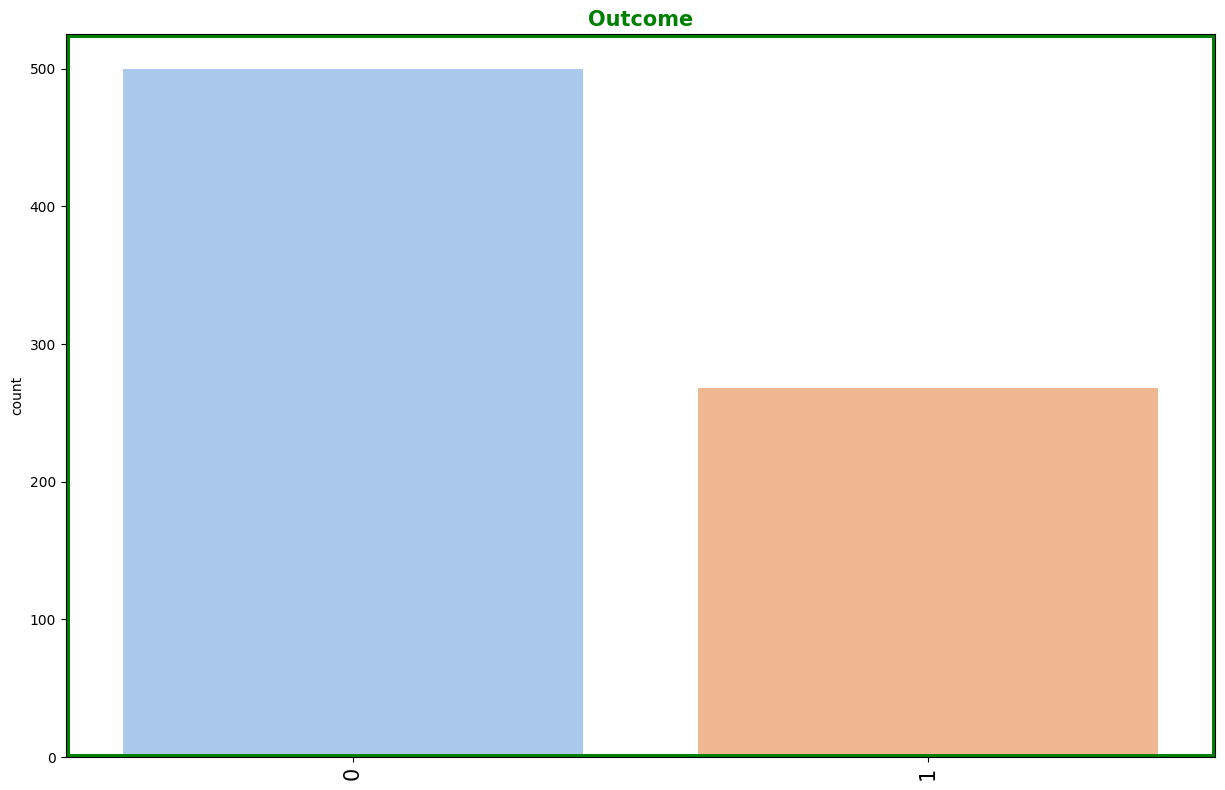

🔢 NUMERIC VARIABLES


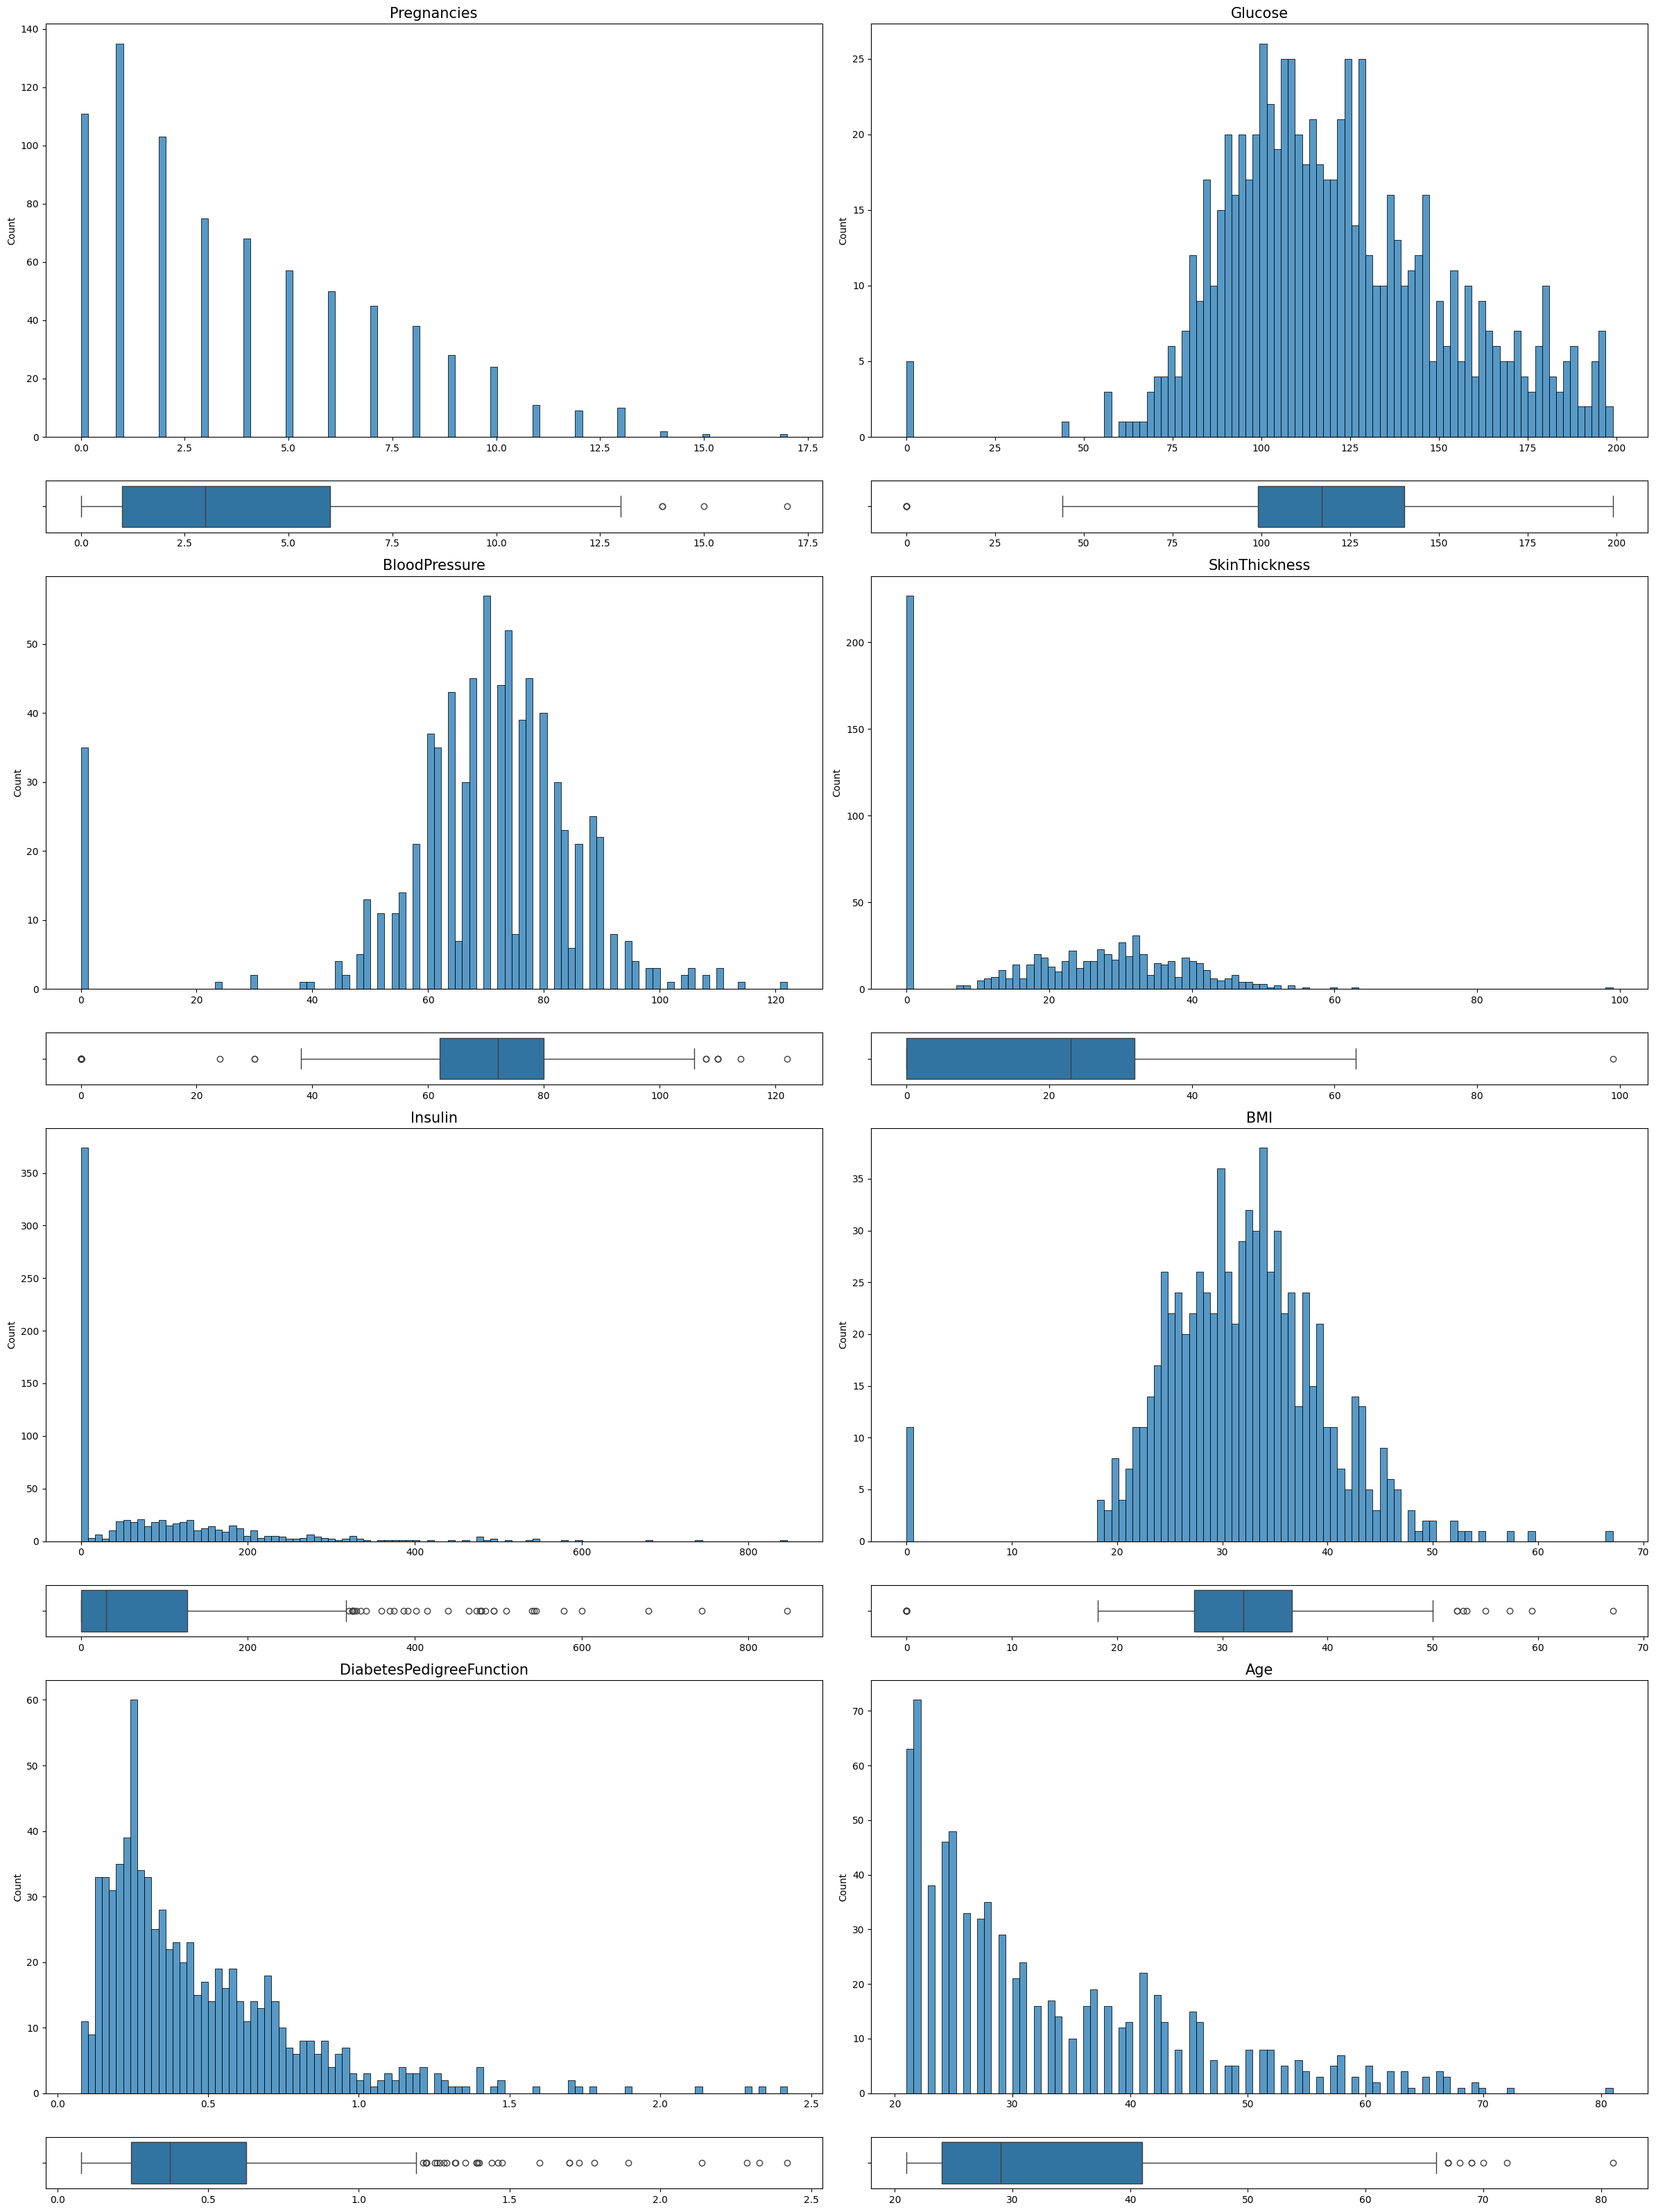

In [10]:
# -------------------------------
# STEP 5 - UNIVARIABLE ANALYSIS
# -------------------------------
print("STEP 5 - UNIVARIABLE ANALYSIS")

if not make_plots:
    print("⚠️ UNIVARIABLE ANALYSIS is not printed, set make_plots = True")
else:

    # Copy of previous DataFrame
    df_S5 = df_S4.copy()

    # Target highlighting styles
    target_box_style = dict(facecolor='none', edgecolor=y_var_highlighting_color, linewidth=5)
    target_title_style = dict(fontsize= my_font_size, color=y_var_highlighting_color, fontweight='bold')

    # CATEGORY VARIABLES (including target if categorical)
    print("🏷️ CATEGORY VARIABLES")

    if not category_att and y_var_type == "NUMERIC":
        print("  ⚠️ This type of plot is non applicable for this case, because there are not CATEGORIC variables in the DataFrame")
    else:    
        var_to_plot = category_att.copy()
        if y_var_type == "CATEGORIC" and y_var not in var_to_plot:
            var_to_plot.insert(0, y_var)

        num_rows = math.ceil(len(var_to_plot) / num_cols)

        fig, axes = plt.subplots(
            nrows=num_rows,
            ncols=num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
        )

        axes = axes.flatten()
        idx = 0

        for col in var_to_plot:
            unique_count = df_S5[col].nunique()

            if unique_count > num_values_to_plot:
                order = df_S5[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S5[col].value_counts().index

            sns.countplot(
                ax=axes[idx],
                data=df_S5,
                x=col,
                hue=col,
                palette=my_palette,
                order=order,
                legend=False
            )
            axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
            axes[idx].set_xlabel("")

            # Highlight target
            if col == y_var:
                axes[idx].set_title(col, **target_title_style)
                axes[idx].add_patch(
                    plt.Rectangle((0, 0), 1, 1, transform=axes[idx].transAxes, **target_box_style)
                )
            else:
                axes[idx].set_title(col, fontdict = {"fontsize": my_font_size})

            # Add truncated info
            if unique_count > num_values_to_plot:
                msg = f"There are {unique_count} values,\nbut only {num_values_to_plot} have been plotted"
                axes[idx].text(
                    0.5, 0.9, msg,
                    transform=axes[idx].transAxes,
                    fontsize=my_font_size,
                    color="red",
                    ha="center", va="top",
                    bbox=dict(facecolor="grey", alpha=0.25, edgecolor="red")
                )

            idx += 1

        # Hide unused axes
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()

    # NUMERIC VARIABLES (including target if numeric)
    print("🔢 NUMERIC VARIABLES")

    if not numeric_att and y_var_type == "CATEGORIC":
        print("  ⚠️ This type of plot is non applicable for this case, because there are not NUMERIC variables in the DataFrame")
    else: 
        var_to_plot = numeric_att.copy()
        if y_var_type == "NUMERIC" and y_var not in var_to_plot:
            var_to_plot.insert(0, y_var)

        num_rows = math.ceil(len(var_to_plot) / num_cols)

        fig, axes = plt.subplots(
            nrows=num_rows * 2,
            ncols=num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
        )

        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):

                if var_idx >= len(var_to_plot):
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
                    continue

                colname = var_to_plot[var_idx]

                # Histogram
                sns.histplot(
                    ax=axes[row * 2, col],
                    data=df_S5,
                    x=colname,
                    bins=num_bins
                )
                axes[row * 2, col].set_xlabel("")

                # Boxplot
                sns.boxplot(
                    ax=axes[row * 2 + 1, col],
                    data=df_S5,
                    x=colname
                )
                axes[row * 2 + 1, col].set_xlabel("")

                # Highlight target
                if colname == y_var:
                    axes[row * 2, col].set_title(colname, **target_title_style)
                    axes[row * 2 + 1, col].set_title(colname, **target_title_style)

                    axes[row * 2, col].add_patch(
                        plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2, col].transAxes, **target_box_style)
                    )
                    axes[row * 2 + 1, col].add_patch(
                        plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2 + 1, col].transAxes, **target_box_style)
                    )
                else:
                    axes[row * 2, col].set_title(colname, fontdict = {"fontsize": my_font_size})

                var_idx += 1

        plt.tight_layout()
        plt.show()


CONCLUSIONS:
- there are around double negative than positive in diabetes
- Glucose, BloodPressure, SkinThickness, Insulin, BMI present many zero values, which are impossible, so they will be taken as missing values
- most of the data present outliers

STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET

 🔢 NUMERIC Attributes VS 🏷️ CATEGORY Target


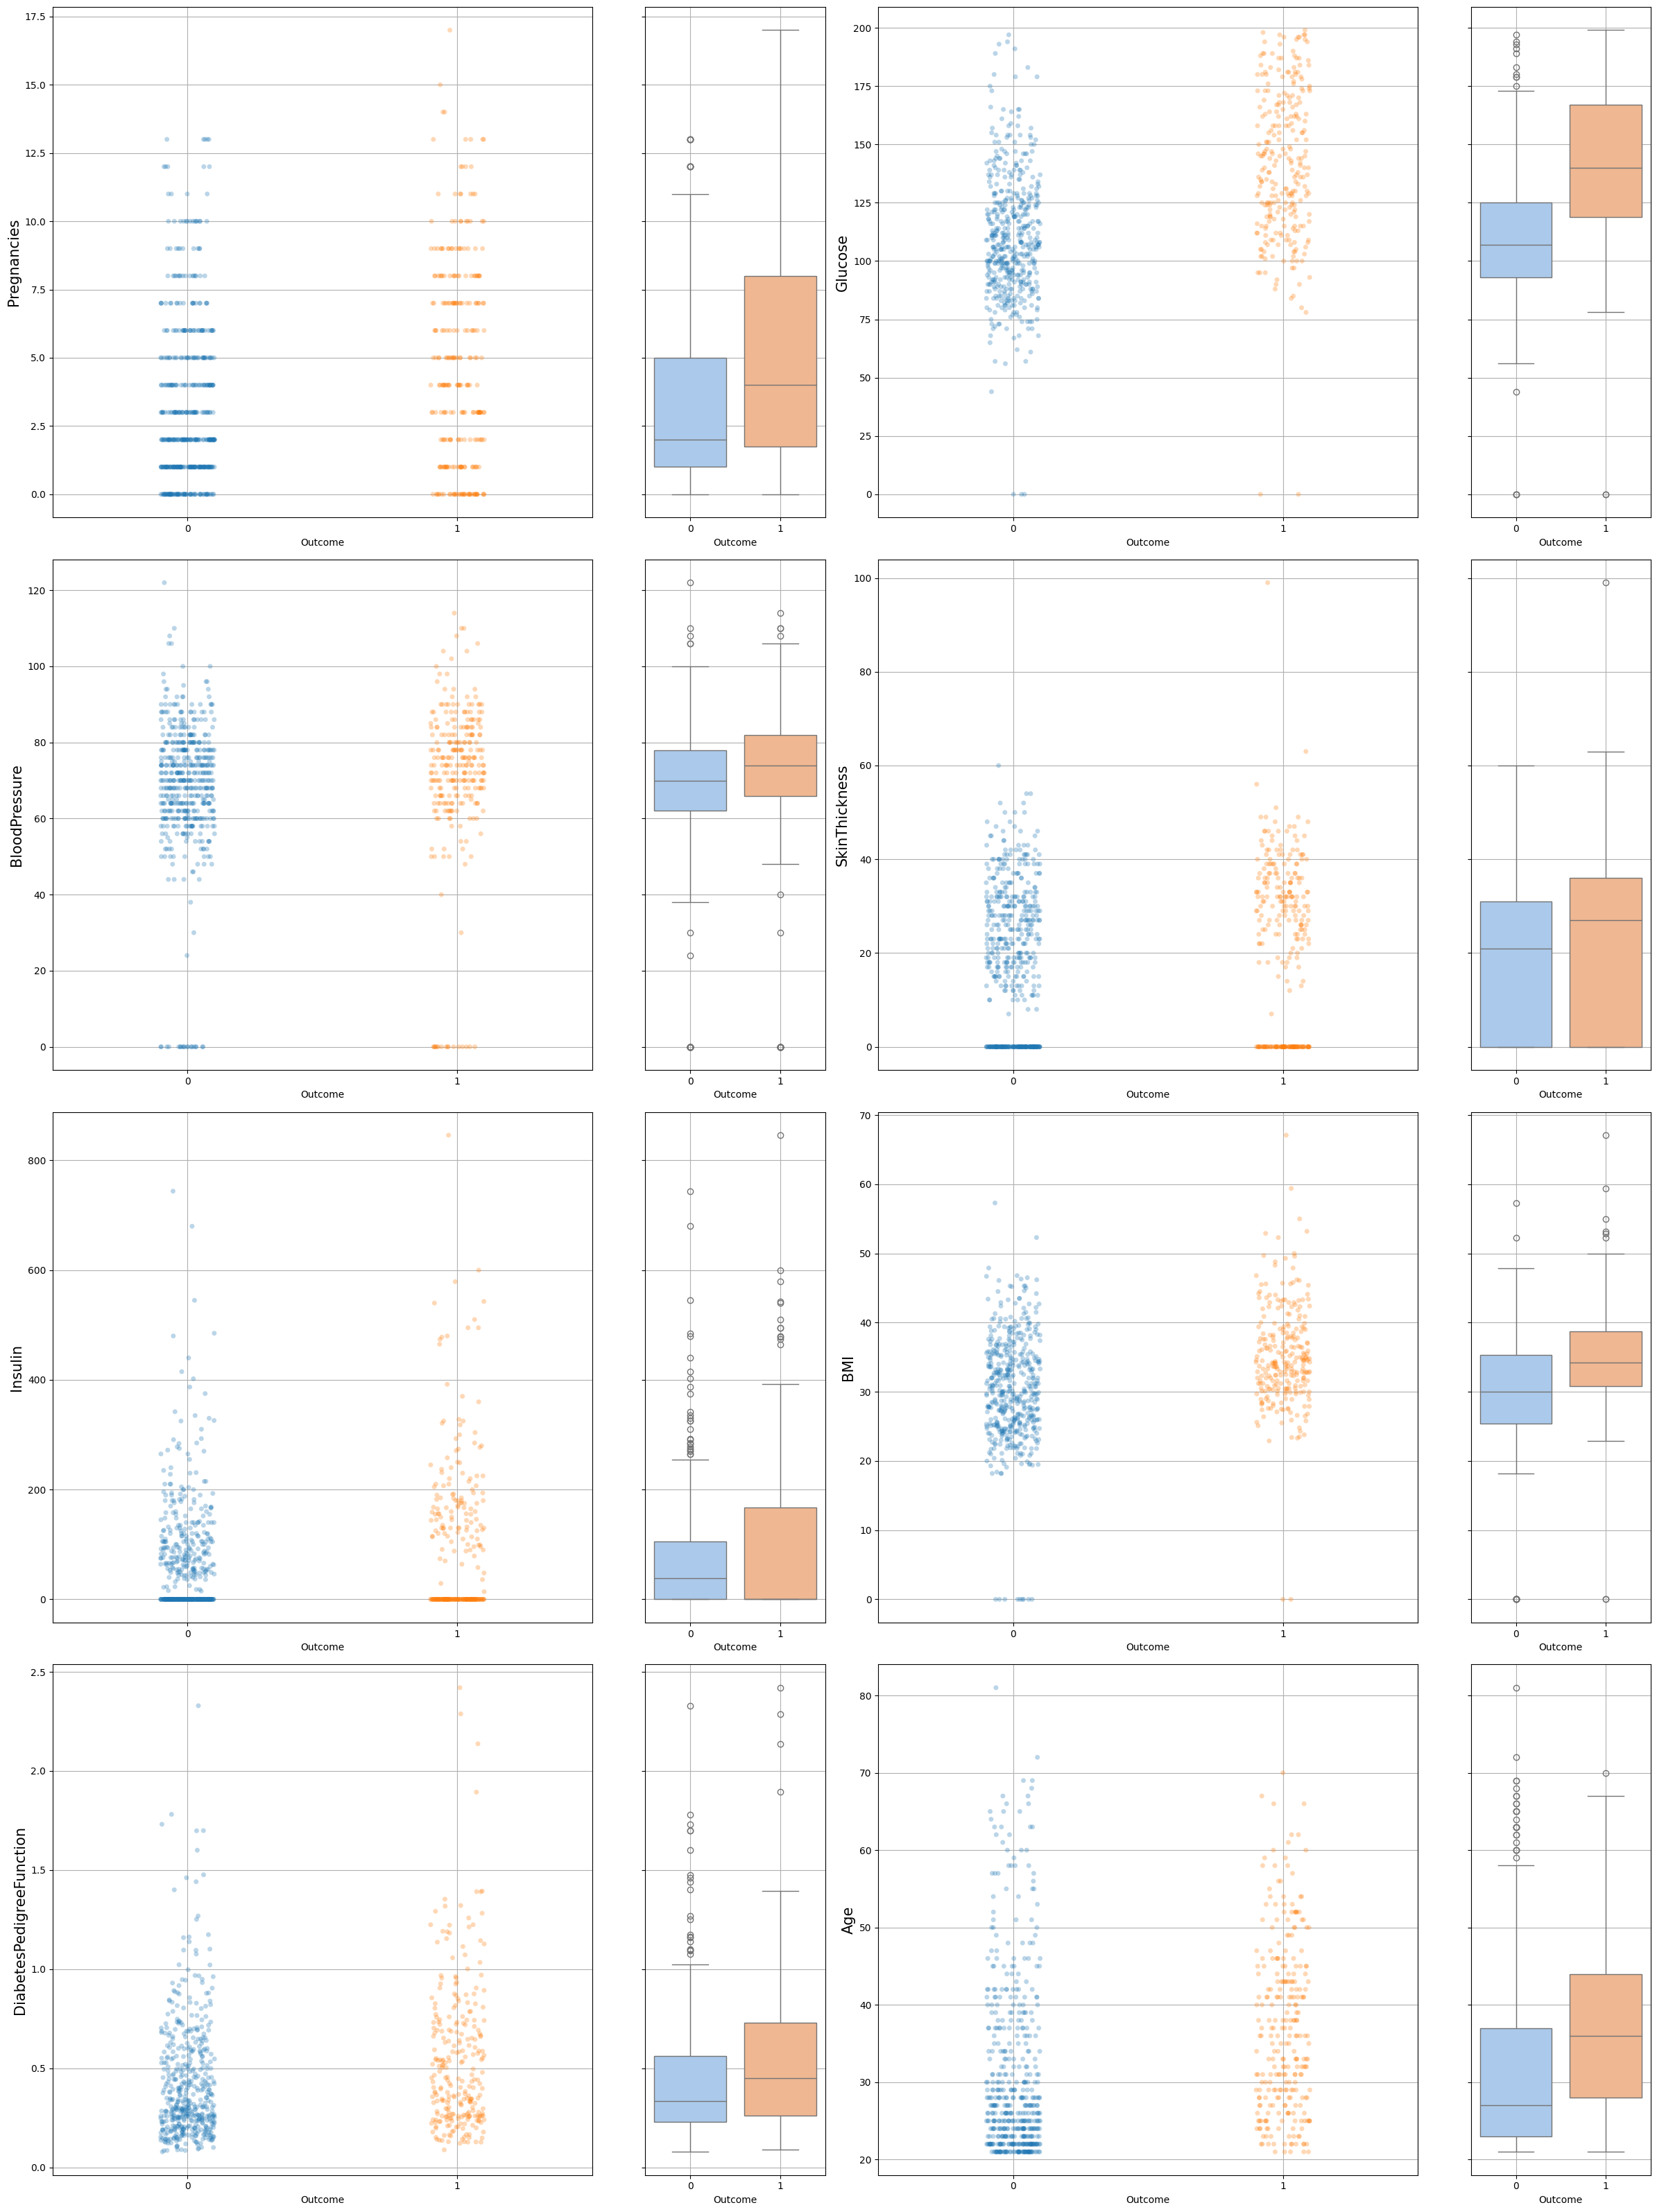


 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target
  ⚠️ This type of plot is non applicable for this case, because the target variable is CATEGORIC

 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target
  ⚠️ This type of plot is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame

 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target
  ⚠️ This type of plot is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame


In [11]:
# -------------------------------
# STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET
# -------------------------------
print("STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET")

if not make_plots:
    print("⚠️ MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S6 = df_S4.copy()
    print("\n 🔢 NUMERIC Attributes VS 🏷️ CATEGORY Target")

    if not numeric_att:
        print("  ⚠️ This type of plot is non applicable for this case, because there are not NUMERIC attributes in the DataFrame")
    elif y_var_type == "NUMERIC":
        print("  ⚠️ This type of plot is non applicable for this case, because the target variable is NUMERIC")
    else:
        # Set plotting variables
        var_to_plot=numeric_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots with custom height ratios
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols * 2,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'width_ratios': [3, 1] * num_cols})

        # Loop through variables
        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):
                if var_idx >= len(var_to_plot):
                    # Hide unused subplots
                    axes[row, col * 2].set_visible(False)
                    axes[row , col* 2 + 1].set_visible(False)
                    continue
                
                sns.stripplot(
                    ax = axes[row, col * 2],
                    data = df_S6,
                    x = y_var,
                    y = var_to_plot[var_idx],
                    hue = y_var,
                    alpha = 0.3,
                    legend = False)
                axes[row, col * 2].set_ylabel(var_to_plot[var_idx],fontdict = {"fontsize": my_font_size})
                axes[row, col * 2].grid(True)

                sns.boxplot(
                    ax = axes[row, col * 2 + 1],
                    data = df_S6,
                    x = y_var,
                    y = var_to_plot[var_idx],
                    hue = y_var,
                    palette = my_palette,
                    legend = False)
                axes[row, col * 2 + 1].set_ylabel("")
                axes[row, col * 2 + 1].grid(True)
                axes[row, col * 2 + 1].set_yticklabels([])
                
                var_idx += 1

        # Adjust layout
        plt.tight_layout()
        plt.show()
        
    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target")

    if not numeric_att:
        print("  ⚠️ This type of plot is non applicable for this case, because there are not NUMERIC attributes in the DataFrame")
    elif y_var_type == "CATEGORIC":
        print("  ⚠️ This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:
        # Set plotting variables
        var_to_plot=numeric_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots with custom height ratios
        fig, axes = plt.subplots(
            nrows = num_rows * 2,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'height_ratios': [4, 1] * num_rows})

        # Loop through variables
        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):
                if var_idx >= len(var_to_plot):
                    # Hide unused subplots
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
                    continue

                # Regplot (top)
                sns.regplot(
                    ax = axes[row * 2, col],
                    data = df_S6,
                    x = var_to_plot[var_idx],
                    y = y_var,
                    scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                    line_kws = {'color': 'red'})

                # Boxplot (bottom)
                sns.heatmap(
                    ax = axes[row * 2 + 1, col],
                    data = df_S6[[var_to_plot[var_idx], y_var]].corr(),
                    annot = True,
                    fmt = ".2f",
                    cbar = False)

                var_idx += 1

        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    print("\n 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target")

    if not category_att:
        print("  ⚠️ This type of plot is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame")
    elif y_var_type == "CATEGORIC":
        print("  ⚠️ This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:        
        # Set plotting variables
        var_to_plot=category_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows))

        # flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:

            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create barplot
            sns.barplot(
                ax=axes[idx],
                data = df_S6,
                x = col,
                y = y_var,
                hue = category_combi_att,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize = my_font_size,
                    color = 'red',
                    ha = 'center',
                    va = 'top',
                    bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

    print("\n 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target")

    if not category_att:
        print("  ⚠️ This type of plot is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame")
    elif y_var_type == "NUMERIC":
        print("  ⚠️ This type of plot is non applicable for this case, because the target variable is NUMERIC")
    else:
        # Set plotting variables
        hue_order = sorted(df_S6[y_var].dropna().unique().tolist()) # Determine hue order dynamically
        var_to_plot=category_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
            
        # Flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:
            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create countplot
            sns.countplot(
                ax = axes[idx],
                data = df_S6,
                x = col,
                hue = y_var,
                hue_order = hue_order,
                palette = my_palette,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize=my_font_size,
                    color='red',
                    ha='center',
                    va='top',
                    bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()


CONCLUSIONS:
- all attributes seem to have impact into getting Outcome = 1 (positive), the higher the attribute, the higher the changes to get Outcome = 1

STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes


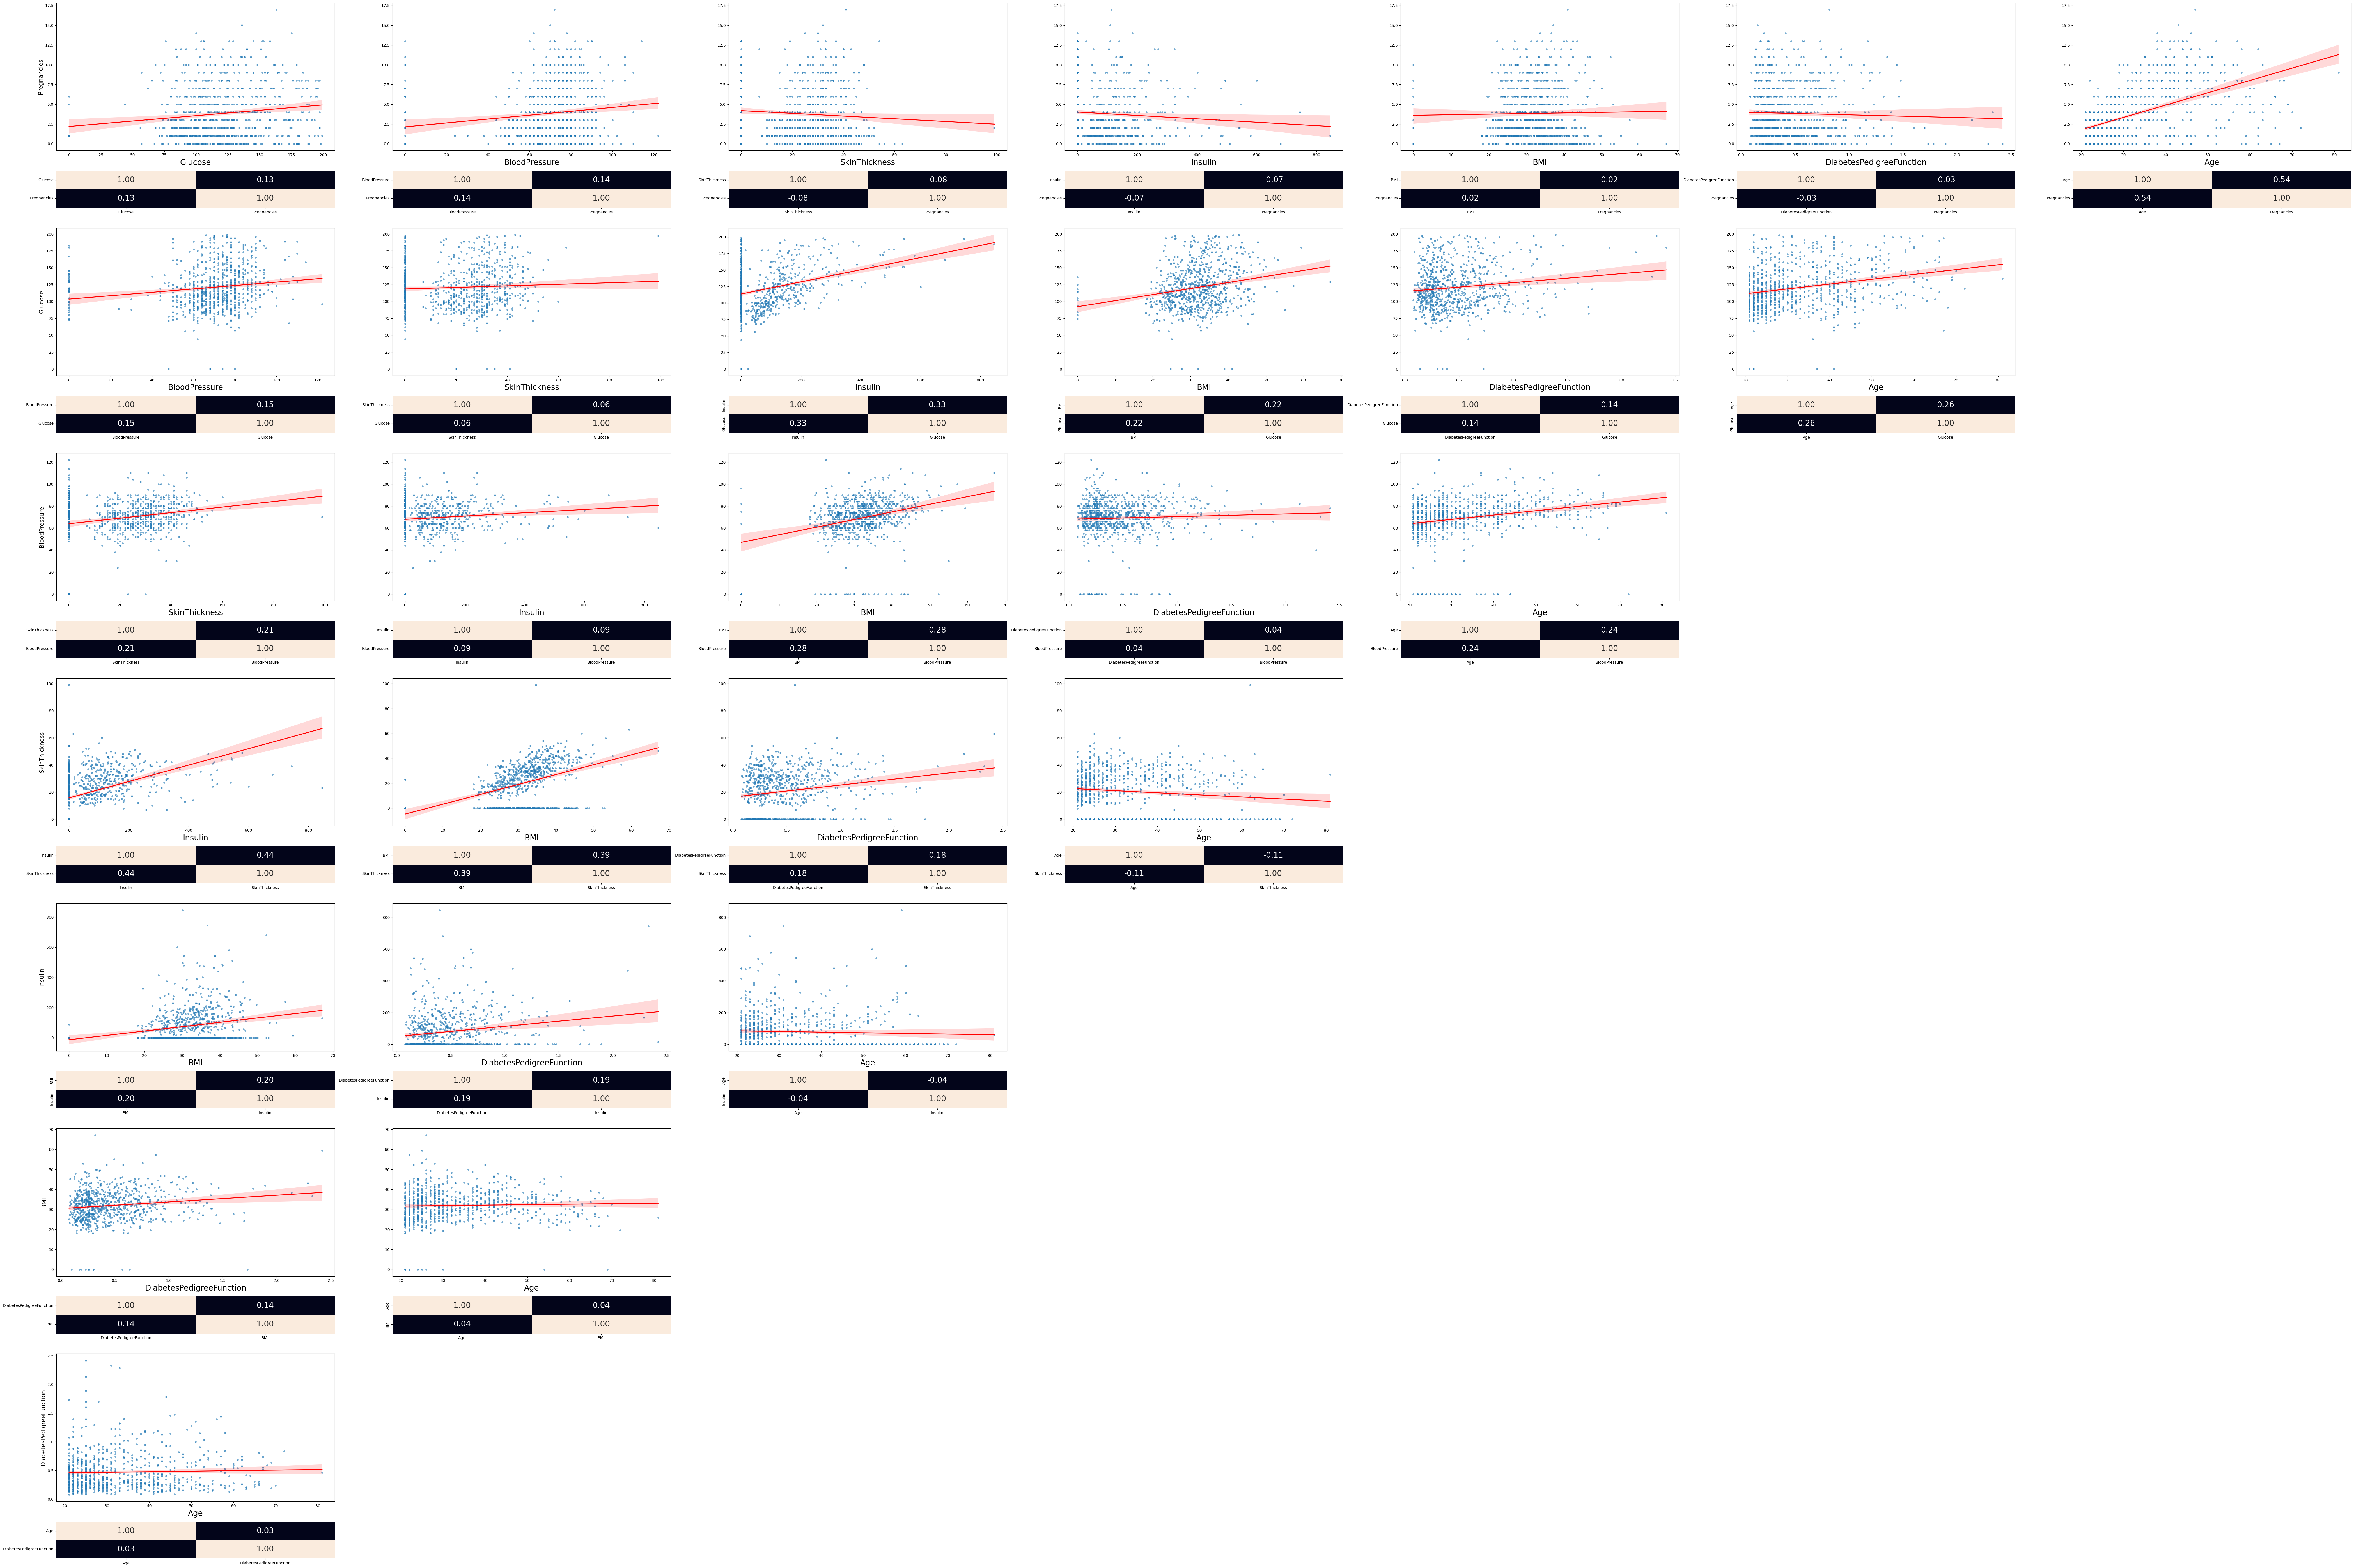


 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes
⚠️ Not enough categorical attributes for a correlation matrix.


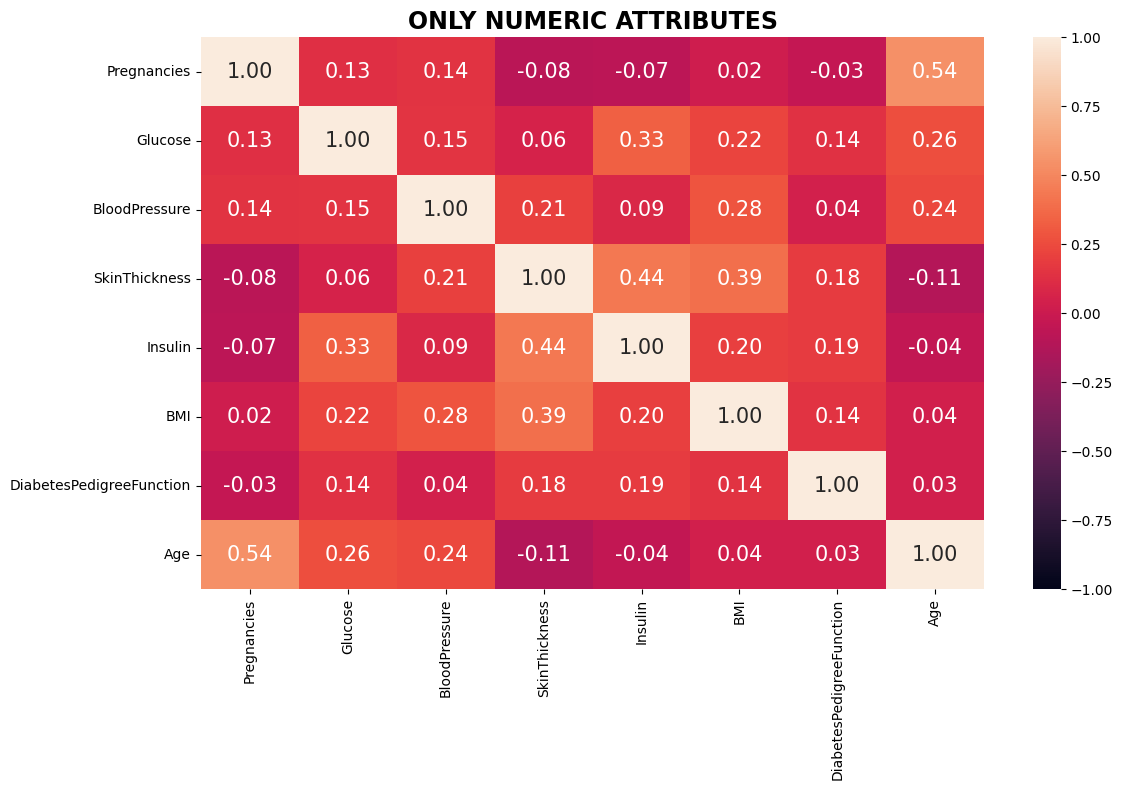

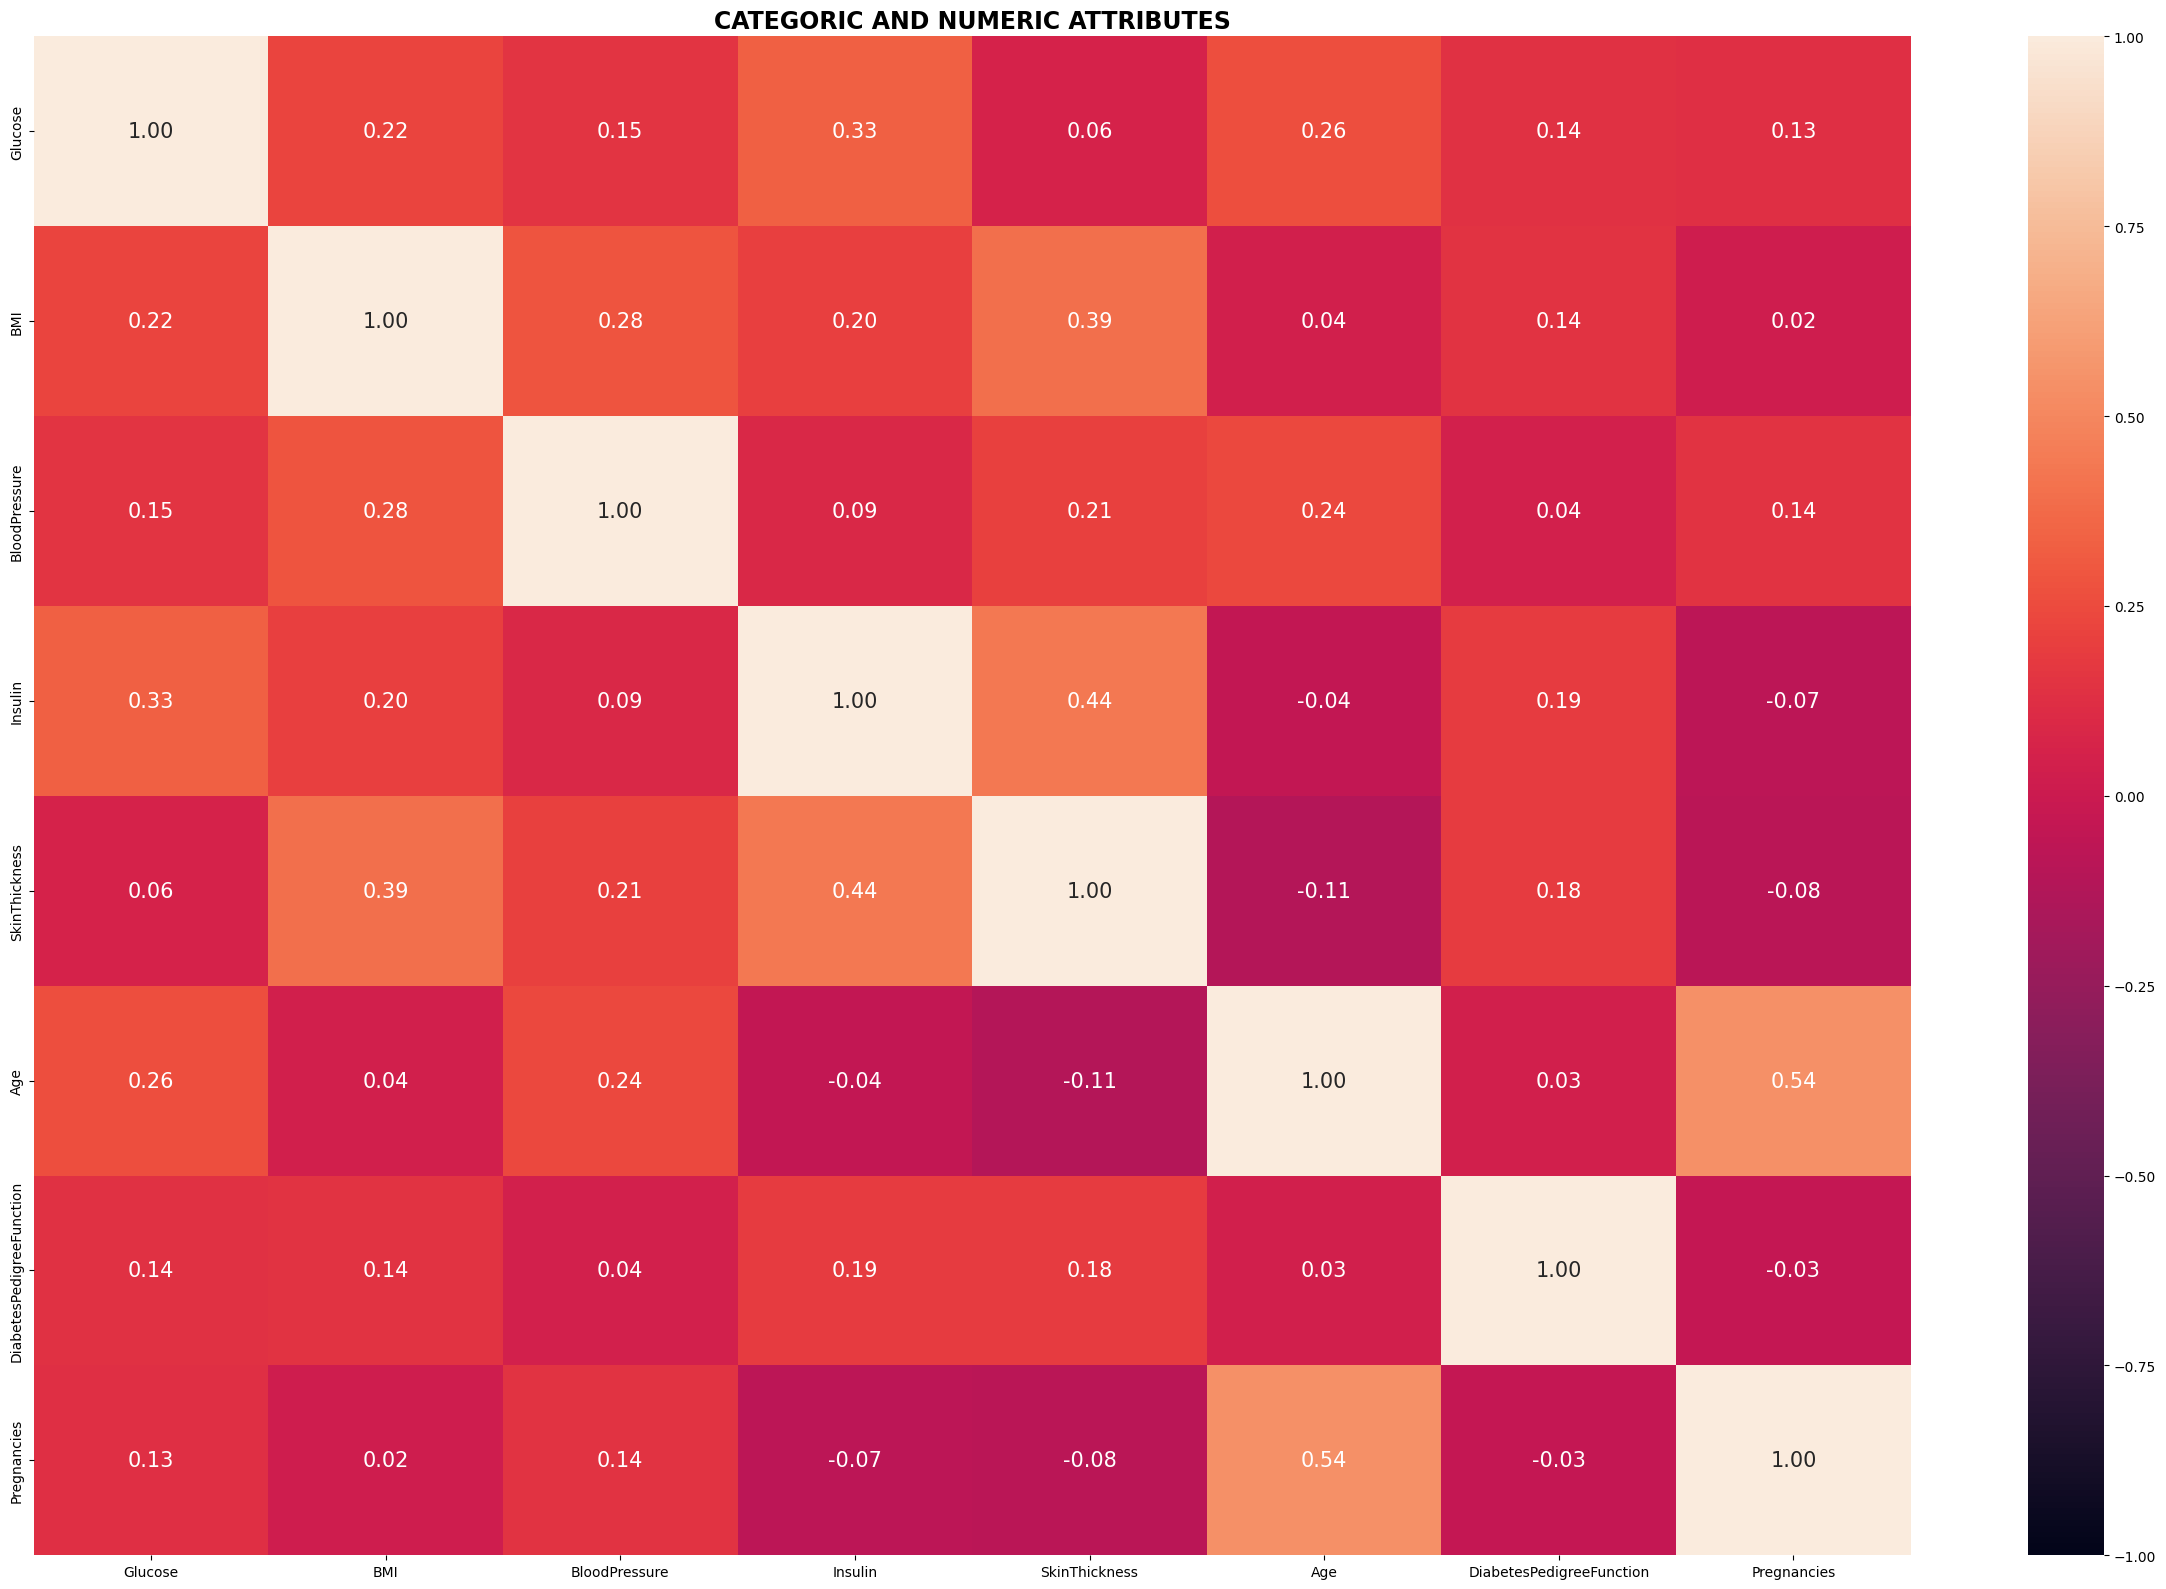

<Figure size 1200x800 with 0 Axes>

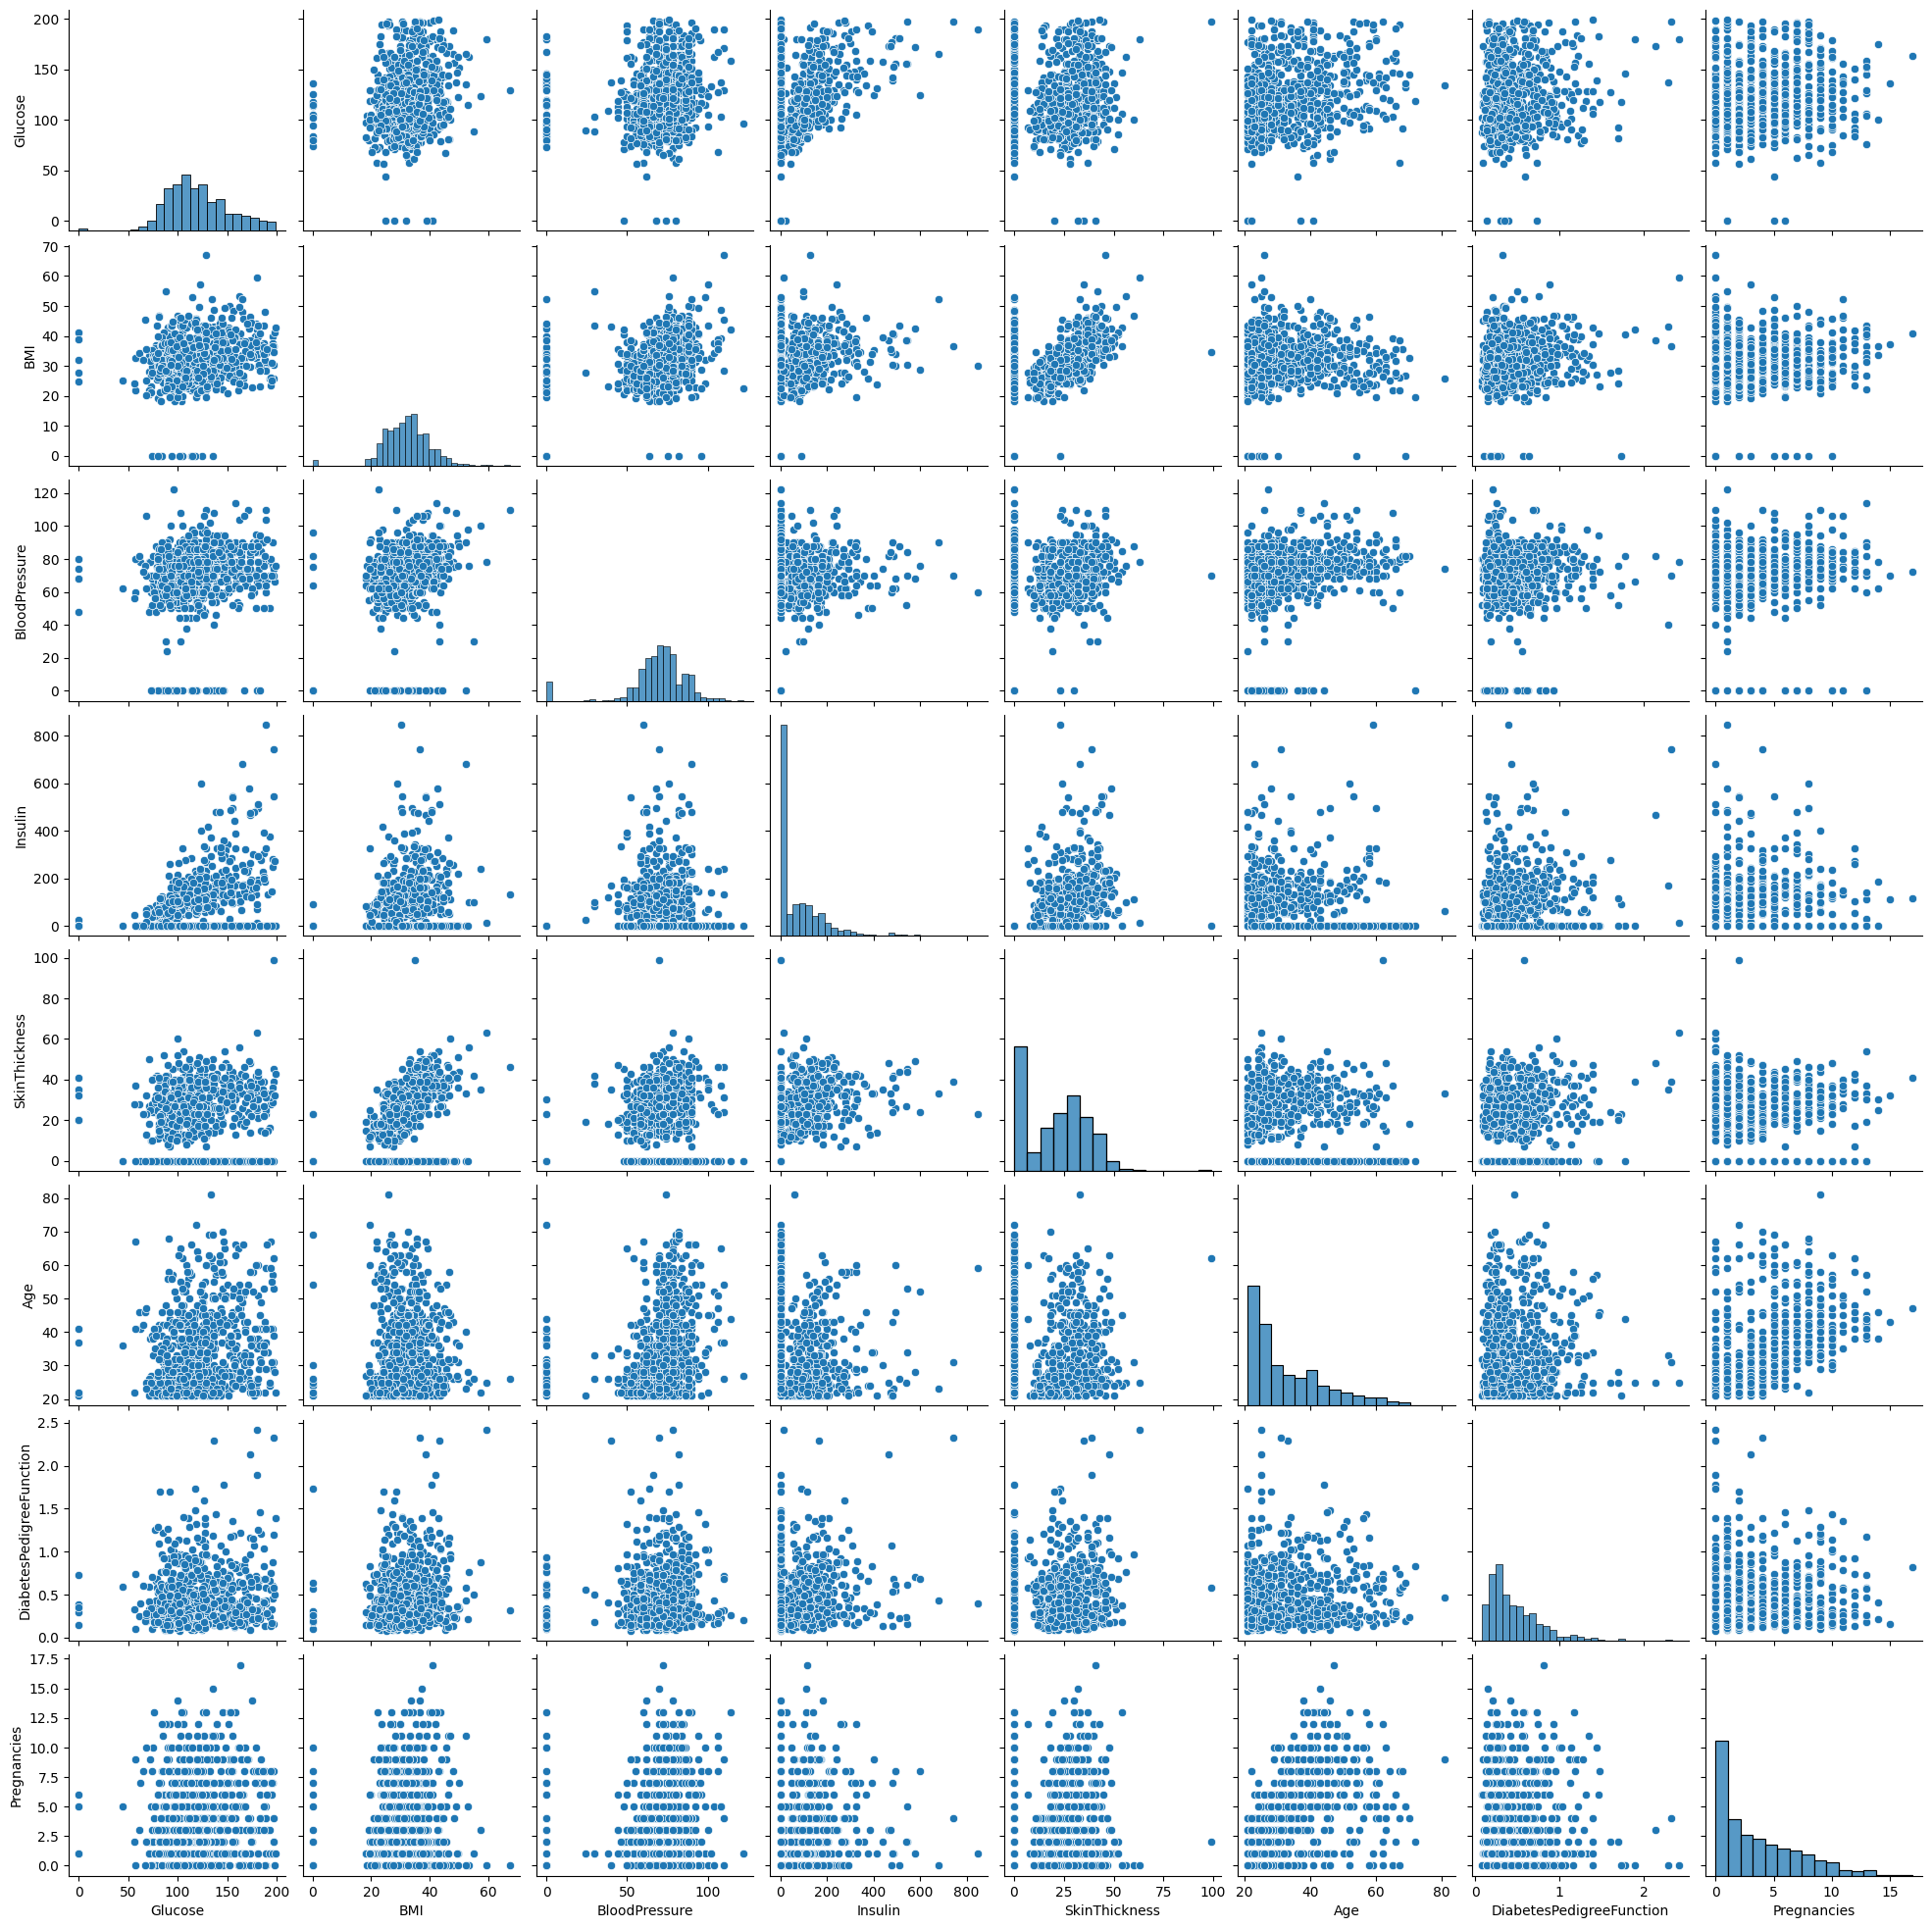

In [12]:
# -------------------------------
# STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES
# -------------------------------
print("STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES")

if not make_plots:
    print("⚠️ MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES is not printed, set make_plots = True")
else:
    # Copy of previous DataFrame
    df_S7 = df_S4.copy()

    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes")

    var_to_plot = numeric_att
    num_rows = len(var_to_plot) - 1  # Number of rows (one less than number of variables)

    # Create subplots with two stacked plots (regplot + heatmap) per variable pair
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = len(var_to_plot) - 1,
        figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 1] * num_rows})

    # Flatten axes for easy handling
    axes = np.array(axes)

    # Track subplot usage
    for row in range(num_rows):
        n_cols = len(var_to_plot) - row - 1  # Decreasing number of columns each row
        for col in range(n_cols):

            # Top: regplot
            sns.regplot(
                ax = axes[row * 2, col],
                data = df_S7,
                x = var_to_plot[row + col + 1],
                y = var_to_plot[row],
                scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                line_kws = {'color': 'red'})
            axes[row * 2, col].set_xlabel(var_to_plot[row + col + 1], fontsize=20)
            axes[row * 2, col].set_ylabel(var_to_plot[row], fontsize=20)

            # Show Y label only for first plot in row
            if col == 0:
                axes[row * 2, col].set_ylabel(var_to_plot[row], fontsize=my_font_size)
            else:
                axes[row * 2, col].set_ylabel("")

            # Bottom: heatmap (correlation)
            sns.heatmap(
                ax = axes[row * 2 + 1, col],
                data = df_S7[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
                annot = True,
                fmt = ".2f",
                cbar = False,
                annot_kws = {"size": 20})

        # Hide unused subplots on the right for this row
        for col in range(n_cols, len(var_to_plot) - 1):
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    print("\n 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes")

    # Encode categorical variables using the Series.factorize() method
    for col in category_att:
        codes, uniques = df_S7[col].factorize()
        df_S7[col] = codes  # replace column with integer codes

    # CATEGORIC ATTRIBUTES HEATMAP
    if len(category_att) > 1:
        corr_cat = df_S7[category_att].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY CATEGORIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_cat,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough categorical attributes for a correlation matrix.")

    # NUMERIC ATTRIBUTES HEATMAP
    if len(numeric_att) > 1:
        corr_num = df_S7[numeric_att].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_num,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough numeric attributes for a correlation matrix.")

    # ALL VARIABLES HEATMAP
    corr_matrix = df_S7[numeric_att + category_att].corr()
    corr_order = corr_matrix.mean().sort_values(ascending=False).index
    corr_matrix = corr_matrix.loc[corr_order, corr_order]

    fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
    plt.title("CATEGORIC AND NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_matrix,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()

    # PAIRPLOT (sorted by correlation order)
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    sns.pairplot(data=df_S7[corr_order])
    plt.show()


CONCLUSIONS:
- attributes do not keep a hight correlation between them -> no noise

STEP 8) MISSING VALUES
- ⚠️ Values equal to 0 in 'Glucose' have been replaced by NaN
- ⚠️ Values equal to 0 in 'BloodPressure' have been replaced by NaN
- ⚠️ Values equal to 0 in 'SkinThickness' have been replaced by NaN
- ⚠️ Values equal to 0 in 'Insulin' have been replaced by NaN
- ⚠️ Values equal to 0 in 'BMI' have been replaced by NaN
- ✅ Target variable 'Outcome' has no missing values.
- ℹ️ Target variable 'Outcome' added to grouping keys for numeric imputation
- ⚠️ Column: Insulin → 48.70% missing
 - ⚠️ FILLED missing numeric values in Insulin using grouped median by ['Outcome']...

- ⚠️ Column: SkinThickness → 29.56% missing
 - ⚠️ FILLED missing numeric values in SkinThickness using grouped median by ['Outcome']...

- ⚠️ Column: BloodPressure → 4.56% missing
 - ⚠️ DROPPED rows with missing values in BloodPressure (4.56% ≤ 5.0%)...

- ⚠️ Column: BMI → 1.43% missing
 - ⚠️ DROPPED rows with missing values in BMI (1.43% ≤ 5.0%)...

- ⚠️ Column: Glucose → 0.65% missing
 - ⚠️ DROPPED 

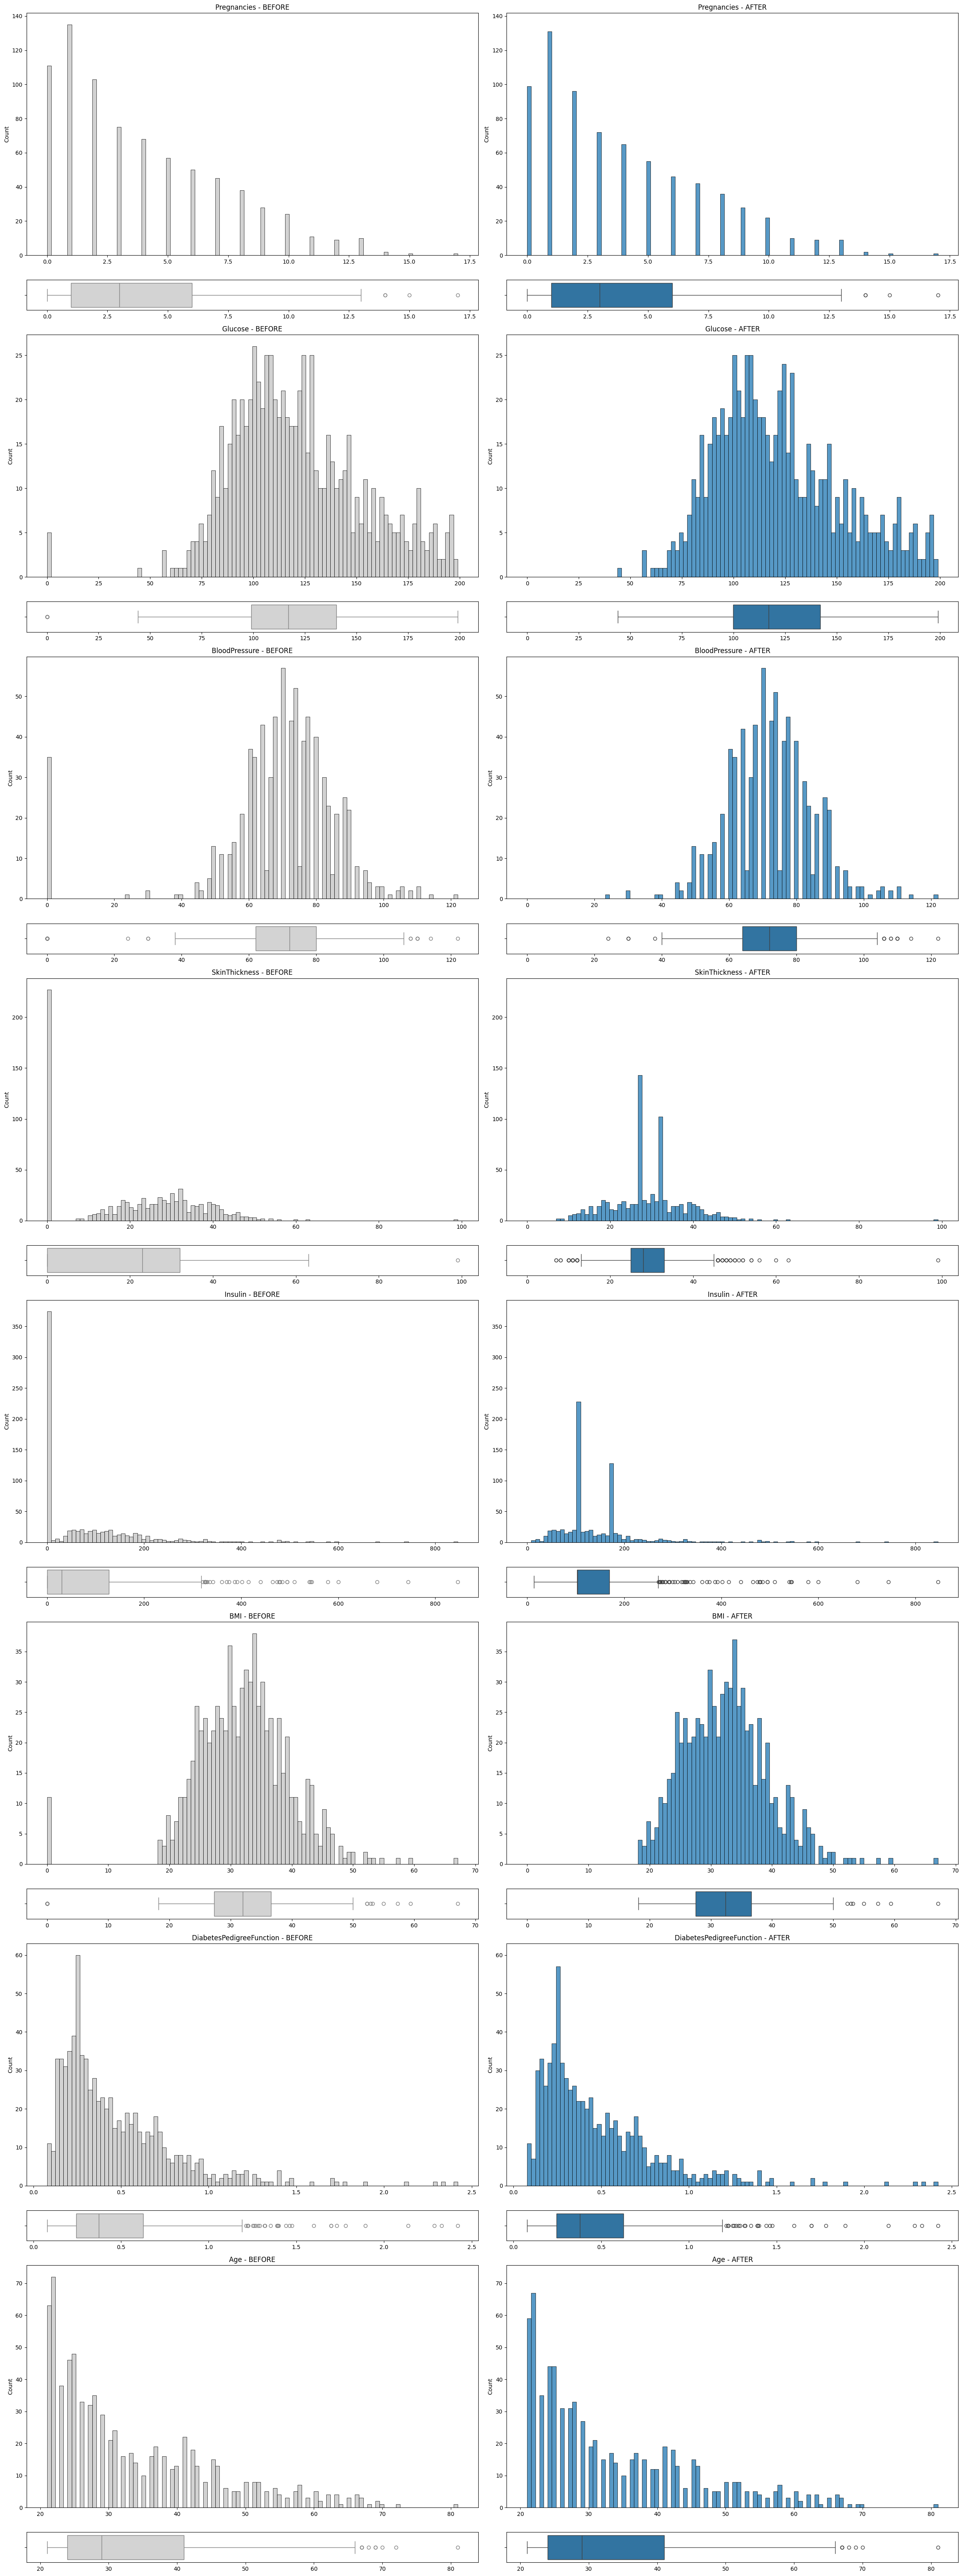

In [13]:
print("STEP 8) MISSING VALUES")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
zero_to_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]  # List of attributes where zero should be considered missing
filling_threshold = 5.0 # [%] If missing perc > filling_threshold → fill values, otherwise drop rows
grouping_max_unique = 6 # Max number of unique values for a categorical attribute to be usable as keys for grouped median

# Copy of previous DataFrame
df_S8 = df_S4.copy()

# Replace zeros by NaN for selected columns
for col in zero_to_nan:
    if col in df_S8.columns:
        df_S8[col] = df_S8[col].replace(0, np.nan)
        print(f"- ⚠️ Values equal to 0 in '{col}' have been replaced by NaN")

# TARGET VARIABLE
missing_y = df_S8[y_var].isnull().sum()

if missing_y > 0:
    print(f"- ⚠️ Target variable '{y_var}' contains {missing_y} missing values → rows will be dropped.")
    df_S8 = df_S8.dropna(subset=[y_var])
else:
    print(f"- ✅ Target variable '{y_var}' has no missing values.")

# Identify categorical variables usable as grouping keys for numeric imputation
group_vars = []

# Normal categorical attributes
for col in category_att:
    if df_S8[col].nunique() <= grouping_max_unique:
        group_vars.append(col)

# Add target as grouping variable if it is CATEGORICAL and has few unique values
if y_var_type == "CATEGORIC":
    if df_S8[y_var].nunique() <= grouping_max_unique:
        group_vars.append(y_var)
        print(f"- ℹ️ Target variable '{y_var}' added to grouping keys for numeric imputation")

# Calculate missing percentages per column
missing_pct = (df_S8.isnull().sum() / len(df_S8)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all (excluding target variable already handled)")
else:
    # Process each column with missing values
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # CASE 1: NUMERIC ATTRIBUTE
        if col in numeric_att:

            # CASE 1A: grouped median
            if pct > filling_threshold and len(group_vars) > 0:
                print(f" - ⚠️ FILLED missing numeric values in {col} using grouped median by {group_vars}...\n")

                medians = df_S8.groupby(group_vars)[col].median().reset_index()
                medians = medians.rename(columns={col: f"median_{col}"})

                df_S8 = pd.merge(df_S8, medians, on=group_vars, how="left")
                df_S8[col] = df_S8[col].fillna(df_S8[f"median_{col}"])
                df_S8 = df_S8.drop(columns=[f"median_{col}"])

            # CASE 1B: global median
            elif pct > filling_threshold and len(group_vars) == 0:
                print(f" - ⚠️ FILLED missing numeric values in {col} using global median (no grouping columns)...\n")
                df_S8[col] = df_S8[col].fillna(df_S8[col].median())

            # CASE 1C: drop rows
            elif pct <= filling_threshold:
                print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {filling_threshold}%)...\n")
                df_S8 = df_S8.dropna(subset=[col])

        # CASE 2: CATEGORICAL ATTRIBUTE → mode imputation
        elif col in category_att:

            print(f" - ⚠️ FILLED missing categorical values in {col} using mode (most frequent value)...\n")
            mode_value = df_S8[col].mode().iloc[0]
            df_S8[col] = df_S8[col].fillna(mode_value)

        # CASE 3: unsupported
        else:
            print(f" - ℹ️ Column {col} has unsupported type for imputation — dropping rows.\n")
            df_S8 = df_S8.dropna(subset=[col])

# Print results
print("- ✅ Missing values have been handled successfully!")
print(f" - ℹ️ Original df's rows: {len(df_S4)}")
print(f" - ℹ️ Cleaned df's rows: {len(df_S8)}")
print(f" - ℹ️ Final DataFrame shape: {df_S8.shape}")
print(f" - ℹ️ Remaining missing values per column:\n{df_S8.isnull().sum()}")

# BEFORE vs AFTER missing values handling
print("\n📊 VISUAL CHECK - BEFORE vs AFTER missing values handling")

df_S8_before = df_S4.copy()   # Before missing-value handling
df_S8_after = df_S8.copy()    # After missing-value handling

if not numeric_att:
    print("   This type of plot is non applicable for this case, because there are not NUMERIC variables in the DataFrame")

else:
    var_to_plot = numeric_att.copy()
    if y_var_type == "NUMERIC" and y_var not in var_to_plot:
        var_to_plot.insert(0, y_var)

    num_rows = len(var_to_plot)

    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = 2,
        figsize = (figWidth_unit * 2, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 0.5] * num_rows})

    for i, colname in enumerate(var_to_plot):

        # Row indices for histogram and boxplot of this variable
        hist_row  = i * 2
        box_row   = i * 2 + 1

        # Common bins (syncronize BEFORE and AFTER)
        xmin = min(df_S8_before[colname].min(), df_S8_after[colname].min())
        xmax = max(df_S8_before[colname].max(), df_S8_after[colname].max())
        common_bins = np.linspace(xmin, xmax, num_bins + 1)

        # ================
        # BEFORE PLOTS
        # ================
        before_hist_ax = axes[hist_row, 0]
        before_box_ax  = axes[box_row, 0]

        sns.histplot(
            ax = before_hist_ax,
            data = df_S8_before,
            x = colname,
            bins = num_bins,
            color = "gray",
            alpha = 0.35)
        before_hist_ax.set_title(colname + " - BEFORE")
        before_hist_ax.set_xlabel("")

        sns.boxplot(
            ax = before_box_ax,
            data = df_S8_before,
            x = colname,
            color = "lightgray")
        before_box_ax.set_xlabel("")

        # Store BEFORE axis limits
        xlim_hist_before = before_hist_ax.get_xlim()
        ylim_hist_before = before_hist_ax.get_ylim()
        xlim_box_before  = before_box_ax.get_xlim()

        # ================
        # AFTER PLOTS
        # ================
        after_hist_ax = axes[hist_row, 1]
        after_box_ax  = axes[box_row, 1]

        sns.histplot(
            ax = after_hist_ax,
            data = df_S8_after,
            x = colname,
            bins = common_bins)
        after_hist_ax.set_title(colname + " - AFTER")
        after_hist_ax.set_xlabel("")

        sns.boxplot(
            ax = after_box_ax,
            data = df_S8_after,
            x = colname)
        after_box_ax.set_xlabel("")

        # Syncronize axes limits
        after_hist_ax.set_xlim(xlim_hist_before)
        after_hist_ax.set_ylim(ylim_hist_before)
        after_box_ax.set_xlim(xlim_box_before)

    plt.tight_layout()
    plt.show()

STEP 9) CLEAN OUTLIERS


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      29.100829  142.509669   
std       3.362803   30.750030      12.379870       9.105775   91.262976   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  103.750000   
75%       6.000000  142.000000      80.000000      33.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  724.000000                724.000000  724.000000  724.000000  
mean    32.467127                  0.474765   33.350829    0.343923  
std      6.888941                  0.332315   11.765393    0.475344  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.379000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Pregnancies  Glucose  BloodPressure  SkinThickness  \
lower_limit           -6.500000   36.375      40.000000      13.000000   
upper_limit           13.500000  205.375     104.000000      45.000000   
n_outliers_lower       0.000000    0.000       4.000000      22.000000   
n_outliers_upper       4.000000    0.000      10.000000      31.000000   
pct_outliers_lower     0.000000    0.000       0.552486       3.038674   
pct_outliers_upper     0.552486    0.000       1.381215       4.281768   

                       Insulin        BMI  DiabetesPedigreeFunction        Age  
lower_limit           2.000000  13.850000                 -0.328750  -1.500000  
upper_limit         270.000000  50.250000                  1.201250  66.500000  
n_outliers_lower      0.000000   0.000000                  0.000000   0.000000  
n_outliers_upper     51.000000   7.000000                 28.000000   7.000000  
pct_outliers_lower    0.000000   0.000000                  0.000000   0.000000  
pct_outliers_upper    7.044199   0.966851                  3.867403   0.966851

Pregnancies  Glucose  BloodPressure  \
extreme_lower_limit               -14.0   -27.00           16.0   
extreme_upper_limit                21.0   268.75          128.0   
n_extreme_outliers_lower            0.0     0.00            0.0   
n_extreme_outliers_upper            0.0     0.00            0.0   
pct_extreme_outliers_lower          0.0     0.00            0.0   
pct_extreme_outliers_upper          0.0     0.00            0.0   

                            SkinThickness     Insulin        BMI  \
extreme_lower_limit              1.000000  -98.500000   0.200000   
extreme_upper_limit             57.000000  370.500000  63.900000   
n_extreme_outliers_lower         0.000000    0.000000   0.000000   
n_extreme_outliers_upper         3.000000   23.000000   1.000000   
pct_extreme_outliers_lower       0.000000    0.000000   0.000000   
pct_extreme_outliers_upper       0.414365    3.176796   0.138122   

                            DiabetesPedigreeFunction   Age  
extreme_lower_limit                        -0.902500 -27.0  
extreme_upper_limit                         1.775000  92.0  
n_extreme_outliers_lower                    0.000000   0.0  
n_extreme_outliers_upper                    6.000000   0.0  
pct_extreme_outliers_lower                  0.000000   0.0  
pct_extreme_outliers_upper                  0.828729   0.0


- ATTRIBUTE Pregnancies:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected

- ATTRIBUTE Glucose:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected

- ATTRIBUTE BloodPressure:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected

- ATTRIBUTE SkinThickness:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (0.41% <= 1.0%)

- ATTRIBUTE Insulin:
 - ℹ️ None extreme lower outliers detected
 - ✅ KEPT extreme upper outliers (3.18% > 1.0%)

- ATTRIBUTE BMI:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (0.14% <= 1.0%)

- ATTRIBUTE DiabetesPedigreeFunction:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (0.83% <= 1.0%)

- ATTRIBUTE Age:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected
- ✅ ✅Outliers have been handled successfully!
 - ℹ️ Original df's rows: 724


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   715.000000  715.000000     715.000000     715.000000  715.000000   
mean      3.902098  121.404196      72.352448      28.829371  141.404895   
std       3.364243   30.437662      12.289185       8.536229   88.035819   
min       0.000000   44.000000      24.000000       7.000000   15.000000   
25%       1.000000   99.000000      64.000000      24.500000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.500000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      56.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  715.000000                715.000000  715.000000  715.000000  
mean    32.304196                  0.460176   33.348252    0.339860  
std      6.677441                  0.295694   11.767608    0.473993  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.400000                  0.244500   24.000000    0.000000  
50%     32.100000                  0.375000   29.000000    0.000000  
75%     36.500000                  0.614500   41.000000    1.000000  
max     57.300000                  1.699000   81.000000    1.000000


📊 VISUAL CHECK - BEFORE vs AFTER outliers handling


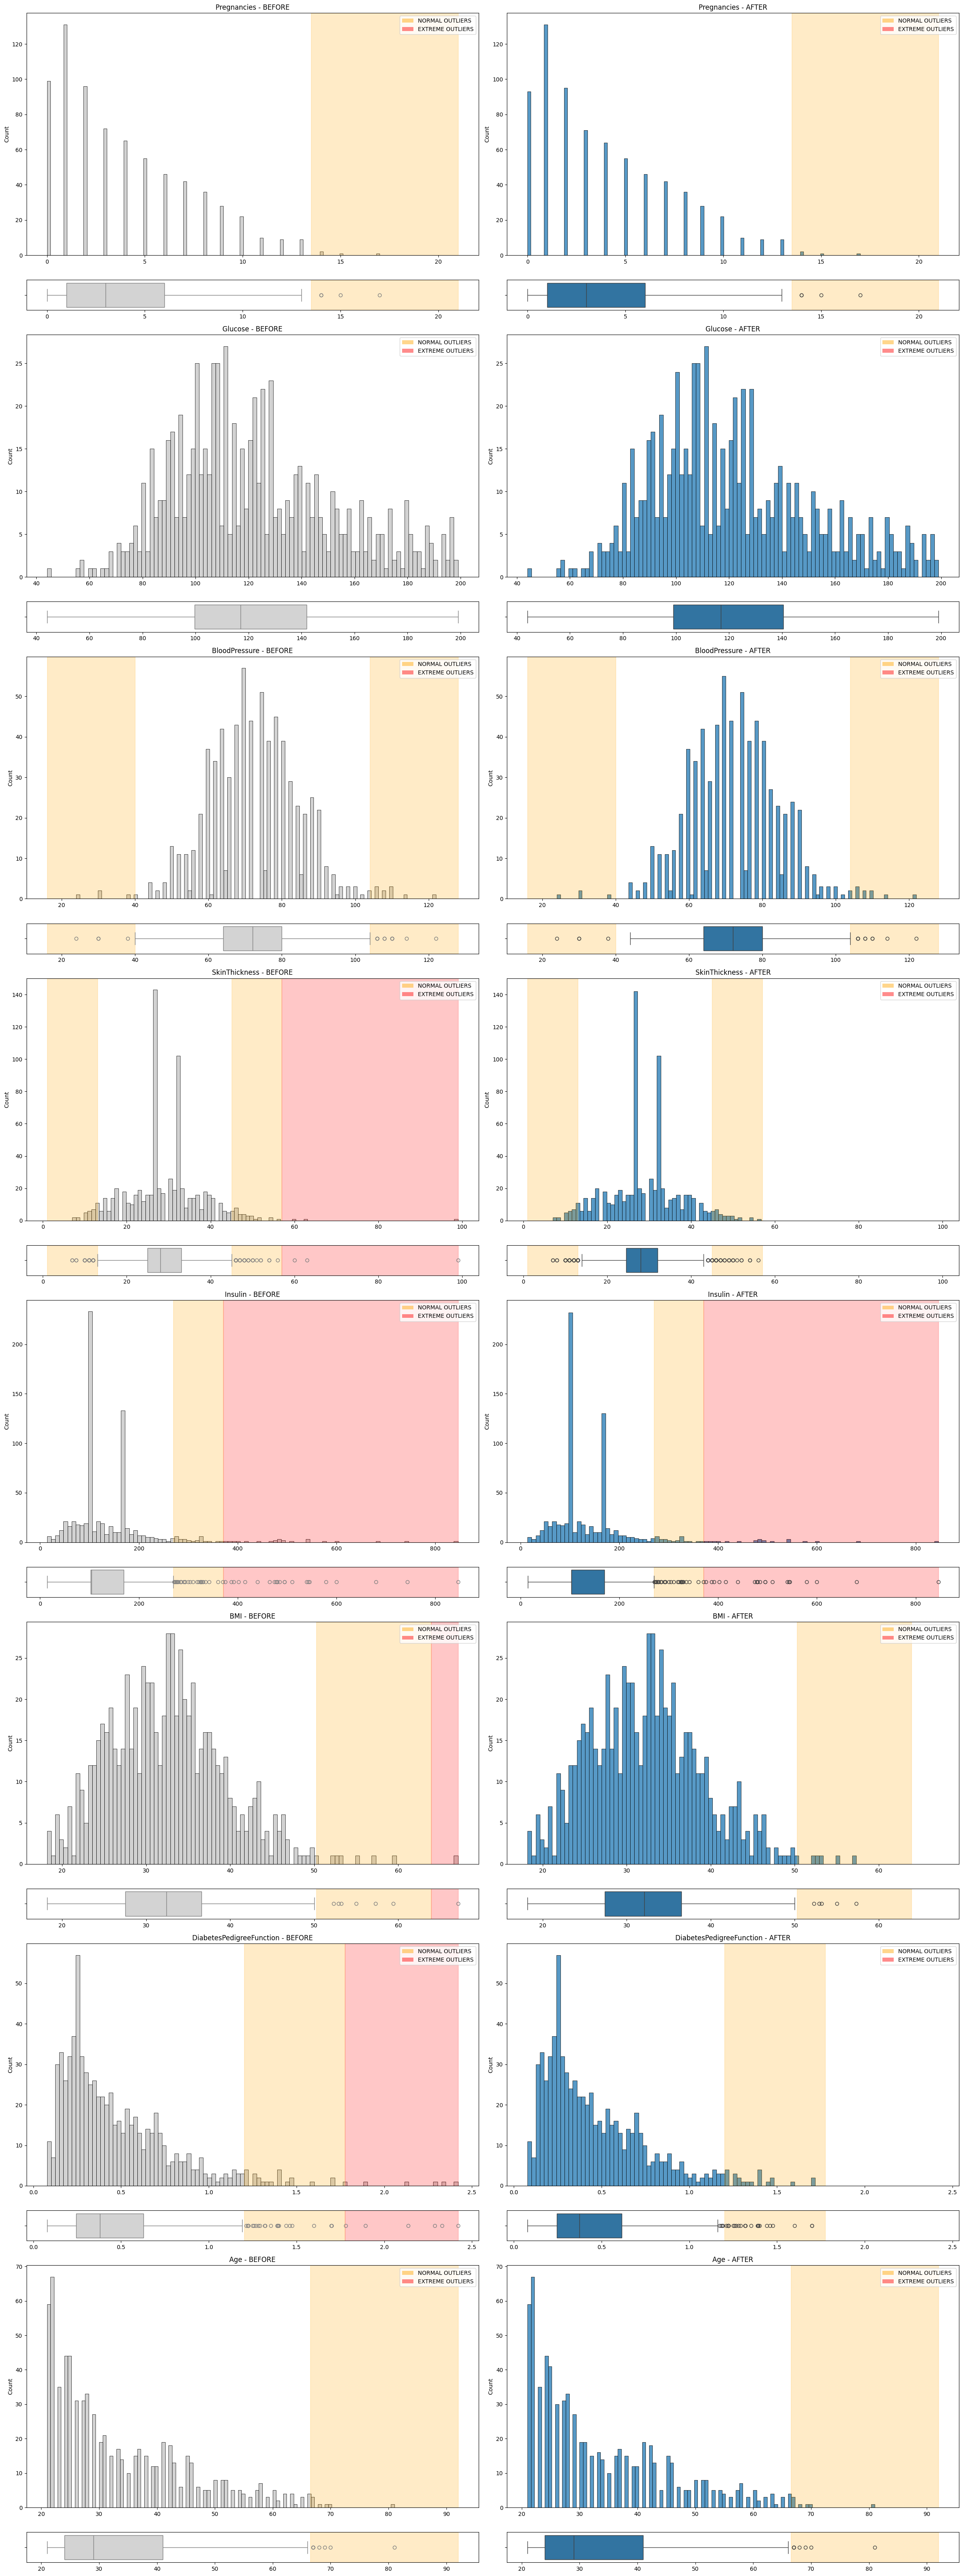

In [14]:
# -------------------------------
# STEP 9) CLEAN OUTLIERS
# -------------------------------
print("STEP 9) CLEAN OUTLIERS")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
low_outliers_threshold = 1.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 1.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# Copy  of previous DataFrame
df_S9=df_S8.copy()

# Print info
display(df_S9.describe())

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_att:
    if col in df_S9.columns.to_list():
        cols.append(col)

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S9.index)

for col in cols:
    Q1 = df_S9[col].quantile(0.25)
    Q3 = df_S9[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S9[col] < lower).sum()
    n_high = (df_S9[col] > upper).sum()
    n_extreme_low = (df_S9[col] < extreme_lower).sum()
    n_extreme_high = (df_S9[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S9.index)) * 100
    pct_high = (n_high / len(df_S9.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S9.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S9.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_att:
    if col in df_S9.columns.to_list():
        cols.append(col)

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"\n- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")

elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"\n- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None extreme lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None extreme upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")

# Print results
print("- ✅ ✅Outliers have been handled successfully!")
print(f" - ℹ️ Original df's rows: {len(df_S8)}")
print(f" - ℹ️ Cleaned df's rows: {len(df_S9)}")
print(f" - ℹ️ Final DataFrame shape: {df_S9.shape}")
display(df_S9.describe())

# BEFORE vs AFTER Outliers handling
print("\n📊 VISUAL CHECK - BEFORE vs AFTER outliers handling")

df_S9_before = df_S8.copy()   # Before missing-value handling
df_S9_after = df_S9.copy()    # After missing-value handling

if not numeric_att:
    print("   This type of plot is non applicable for this case, because there are not NUMERIC variables in the DataFrame")

else:
    var_to_plot = numeric_att
    num_rows = len(var_to_plot)

    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = 2,
        figsize = (figWidth_unit * 2, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 0.5] * num_rows})

    for i, colname in enumerate(var_to_plot):

        # Row indices for histogram and boxplot of this variable
        hist_row  = i * 2
        box_row   = i * 2 + 1

        # Set common bins (syncronize BEFORE and AFTER)
        xmin = min(df_S9_before[colname].min(), df_S9_after[colname].min())
        xmax = max(df_S9_before[colname].max(), df_S9_after[colname].max())
        common_bins = np.linspace(xmin, xmax, num_bins + 1)

        # Set colored area limits
        normal_low = df_limits.loc["lower_limit", colname]
        normal_up  = df_limits.loc["upper_limit", colname]
        extreme_low = df_extreme_limits.loc["extreme_lower_limit", colname]
        extreme_up  = df_extreme_limits.loc["extreme_upper_limit", colname]

        # ================
        # BEFORE PLOTS
        # ================
        before_hist_ax = axes[hist_row, 0]
        before_box_ax  = axes[box_row, 0]

        sns.histplot(
            ax = before_hist_ax,
            data = df_S9_before,
            x = colname,
            bins = num_bins,
            color = "gray",
            alpha = 0.35)
        before_hist_ax.set_title(colname + " - BEFORE")
        before_hist_ax.set_xlabel("")

        sns.boxplot(
            ax = before_box_ax,
            data = df_S9_before,
            x = colname,
            color = "lightgray")
        before_box_ax.set_xlabel("")

        # Outlier count
        pct_low_normal  = df_limits.loc["pct_outliers_lower", colname]
        pct_high_normal = df_limits.loc["pct_outliers_upper", colname]
        pct_low_extreme  = df_extreme_limits.loc["pct_extreme_outliers_lower", colname]
        pct_high_extreme = df_extreme_limits.loc["pct_extreme_outliers_upper", colname]

        # NORMAL Outliers
        if pct_low_normal > 0:
            before_hist_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
            before_box_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
        if pct_high_normal > 0:
            before_hist_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
            before_box_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)

        # EXTREME Outliers
        if pct_low_extreme > 0:
            before_hist_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
            before_box_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
        if pct_high_extreme > 0:
            before_hist_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
            before_box_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)

        # Store BEFORE limits
        xlim_hist_before = before_hist_ax.get_xlim()
        ylim_hist_before = before_hist_ax.get_ylim()
        xlim_box_before  = before_box_ax.get_xlim()

        # ================
        # AFTER PLOTS
        # ================
        after_hist_ax = axes[hist_row, 1]
        after_box_ax  = axes[box_row, 1]

        sns.histplot(
            ax = after_hist_ax,
            data = df_S9_after,
            x = colname,
            bins = common_bins)
        after_hist_ax.set_title(colname + " - AFTER")
        after_hist_ax.set_xlabel("")

        sns.boxplot(
            ax = after_box_ax,
            data = df_S9_after,
            x = colname)
        after_box_ax.set_xlabel("")

        # Check if outliers are still present in AFTER
        normal_low_present  = (df_S9_after[colname] < normal_low).any()
        normal_up_present   = (df_S9_after[colname] > normal_up).any()
        extreme_low_present = (df_S9_after[colname] < extreme_low).any()
        extreme_up_present  = (df_S9_after[colname] > extreme_up).any()

        # NORMAL Outliers
        if normal_low_present:
            after_hist_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
            after_box_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
        if normal_up_present:
            after_hist_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
            after_box_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)

        # EXTREME Outliers
        if extreme_low_present:
            after_hist_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
            after_box_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
        if extreme_up_present:
            after_hist_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
            after_box_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)

        # Legends
        before_hist_ax.legend(
            handles=[
                plt.Rectangle((0,0),1,1, facecolor='orange', alpha=0.45, label="NORMAL OUTLIERS"),
                plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.45, label="EXTREME OUTLIERS")],
            loc="upper right")
        after_hist_ax.legend(
            handles=[
                plt.Rectangle((0,0),1,1, facecolor='orange', alpha=0.45, label="NORMAL OUTLIERS"),
                plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.45, label="EXTREME OUTLIERS")],
            loc="upper right")

        # Syncronize axes limits
        after_hist_ax.set_xlim(xlim_hist_before)
        after_hist_ax.set_ylim(ylim_hist_before)
        after_box_ax.set_xlim(xlim_box_before)

    plt.tight_layout()
    plt.show()

CONCLUSIONS:
- I goint to stablish a "cut" based on EXTREME outliers
- The "cut" would be for a maximum of 1 %, higher that than that, EXTREME outliers will not be dropped

In [15]:
# -------------------------------
# STEP 10) REMOVE NOISY ATTRIBUTES
# -------------------------------
print("STEP 10) REMOVE NOISY ATTRIBUTES")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
corr_threshold = 0.9 # Correlation level considered as "too high"

# Copy of previous DataFrame
df_S10 = df_S9.copy()

#  NUMERIC ATTRIBUTES (Pearson correlation)
corr_matrix = df_S10[numeric_att].corr().abs()
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            if col_i not in to_drop:
                to_drop.add(col_i)

if to_drop:
    df_S10 = df_S10.drop(columns=list(to_drop), axis=1)
    print(f"- ⚠️ High NUMERIC attributes correlation detected (Pearson Corr. > {corr_threshold}). Dropped:")
    for col in to_drop:
        print(f"   • {col}")
else:
    print(f"- ✅ No NUMERIC attributes exceeded {corr_threshold} Pearson Correlation")

#  CATEGORICAL ATTRIBUTES (Cramér's V)
def cramers_v(x, y): 
    # Step 1: confusion matrix
    confusion_matrix = pd.crosstab(x, y)
    # Step 2: chi-square statistic
    chi2 = chi2_contingency(confusion_matrix)[0]
    # Step 3: phi-squared
    total_samples = confusion_matrix.sum().sum()
    phi2 = chi2 / total_samples
    # Shape of confusion matrix
    r, k = confusion_matrix.shape
    num_rows = confusion_matrix.shape[0]
    num_cols = confusion_matrix.shape[1]
    # Step 4: bias correction (recommended formula)
    correction = ((num_cols - 1) * (num_rows - 1)) / (total_samples - 1)
    phi2_corrected = max(0, phi2 - correction)
    # Corrected dimensions
    rows_corrected = num_rows - ((num_rows - 1) ** 2) / (total_samples - 1)
    cols_corrected = num_cols - ((num_cols - 1) ** 2) / (total_samples - 1)
    # Step 5: compute Cramér's V
    denominator = min(rows_corrected - 1, cols_corrected - 1)
    if denominator <= 0:
        return 0  # avoid division by zero for degenerate tables
    cramers_v_value = np.sqrt(phi2_corrected / denominator)
    return cramers_v_value

to_drop_cat = set()

if len(category_att) > 1:
    for i in range(len(category_att)):
        for j in range(i):
            v = cramers_v(df_S10[category_att[i]], df_S10[category_att[j]])
            if v > corr_threshold:
                col_i = category_att[i]
                col_j = category_att[j]
                if col_i not in to_drop_cat:
                    to_drop_cat.add(col_i)

if to_drop_cat:
    df_S10 = df_S10.drop(columns=list(to_drop_cat), axis=1)
    print(f"- ⚠️ High CATEGORICAL attributes association detected (Cramer’s V > {corr_threshold}). Dropped:")
    for col in to_drop_cat:
        print(f"   • {col}")
else:
    print(f"- ✅ No CATEGORICAL attributes exceeded {corr_threshold} Cramer’s V")

#  Print results
print(f"- ℹ️ Previous df's columns: {len(df_S9.columns)}")
print(f"- ℹ️ Cleaned df's  columns: {len(df_S10.columns)}")
print(f"- ℹ️ Final DataFrame shape: {df_S10.shape}")
display(df_S10.head())

STEP 10) REMOVE NOISY ATTRIBUTES
- ✅ No NUMERIC attributes exceeded 0.9 Pearson Correlation
- ✅ No CATEGORICAL attributes exceeded 0.9 Cramer’s V
- ℹ️ Previous df's columns: 9
- ℹ️ Cleaned df's  columns: 9
- ℹ️ Final DataFrame shape: (715, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
5            5    116.0           74.0           27.0    102.5  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [16]:
# -------------------------------
# STEP 11) SPLIT
# -------------------------------
print("STEP 11) SPLIT")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
my_test_size = 0.2
random_seed = 42

# Copy  of previous DataFrame
df_SPLIT = df_S10.copy()

# Separate attributes from target variable
X = df_SPLIT.drop(labels = y_var, axis = 1)
y = df_SPLIT[y_var]

# Make split between Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

STEP 11) SPLIT
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (572, 8)
 - X_test: (143, 8)
 - y_train: (572,)
 - y_test: (143,)

- ℹ️ Content of DataFrames after SPLIT:
 - X_train:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
286            5    155.0           84.0           44.0    545.0  38.7   
65             5     99.0           74.0           27.0    102.5  29.0   
221            2    158.0           90.0           32.0    169.5  31.6   
344            8     95.0           72.0           27.0    102.5  36.8   
571            2    130.0           96.0           27.0    102.5  22.6   

     DiabetesPedigreeFunction  Age  
286                     0.619   34  
65                      0.203   32  
221                     0.805   66  
344                     0.485   57  
571                     0.268   21  
 - X_test:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
132            3    170.0           64.0           37.0    225

In [17]:
# -------------------------------
# STEP 12) SCALLING
# -------------------------------
print("STEP 12) SCALLING")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
make_scalling = False
scaler_dic = { # Instance scaler for each numeric attribute - change manually StandardScaler() or MinMaxScaler()
    "Pregnancies": StandardScaler(),
    "Glucose": StandardScaler(),
    "BloodPressure": StandardScaler(),
    "SkinThickness": StandardScaler(),
    "Insulin": StandardScaler(),
    "BMI": StandardScaler(),
    "DiabetesPedigreeFunction": StandardScaler(),
    "Age": StandardScaler(),
}

# Copy of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

if not numeric_att:
    X_train_es = X_train_es[numeric_att]
    X_test_es = X_test_es[numeric_att]
    print("  ⚠️ SCALLING is non applicable for this case, because there are not NUMERIC attributes in the DataFrame")
elif not make_scalling:
    X_train_es = X_train_es[numeric_att]
    X_test_es = X_test_es[numeric_att]
    print("  ⚠️ SCALLING is is not carried out, set make_scalling = True")
    display(X_train_es.head())
else:

    # Fit scalers ONLY on train data
    for col in numeric_att:
        scaler_dic[col].fit(X_train_es[[col]])
    print("- ✅ All Scalers have been trained successfully")

    # Apply scalers and create scaled columns
    scaled_cols = []

    for col in numeric_att:
        # Detect scaler type
        scaler_name = scaler_dic[col].__class__.__name__
        # Set suffix
        if scaler_name == "StandardScaler":
            suffix = "_SS"
        elif scaler_name == "MinMaxScaler":
            suffix = "_MM"
        else:
            suffix = "_Scaled"

        # Transform
        X_train_es[col + suffix] = scaler_dic[col].transform(X_train_es[[col]])
        X_test_es[col + suffix]  = scaler_dic[col].transform(X_test_es[[col]])

        scaled_cols.append(col + suffix)
        print(f"  - ℹ️ Train/Test scaled for: {col} using {scaler_name} → new column: {col + suffix}")

    # Keep only scaled columns (as in your original design)
    X_train_es = X_train_es[scaled_cols]
    X_test_es  = X_test_es[scaled_cols]

    print("- ✅ Final scaled datasets created successfully!")
    display(X_train_es.head())

STEP 12) SCALLING
  ⚠️ SCALLING is is not carried out, set make_scalling = True


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
286            5    155.0           84.0           44.0    545.0  38.7   
65             5     99.0           74.0           27.0    102.5  29.0   
221            2    158.0           90.0           32.0    169.5  31.6   
344            8     95.0           72.0           27.0    102.5  36.8   
571            2    130.0           96.0           27.0    102.5  22.6   

     DiabetesPedigreeFunction  Age  
286                     0.619   34  
65                      0.203   32  
221                     0.805   66  
344                     0.485   57  
571                     0.268   21

CONCLUSION:
- I do not make scalling beause Decision Tree is an algorithm that does not need scalled data

In [18]:
# -------------------------------
# STEP 13) ENCODING
# -------------------------------
print("STEP 13) ENCODING")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
make_encoding = True

# Copy of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

if not category_att:
    X_train_en = X_train_en[category_att]
    X_test_en = X_test_en[category_att]
    print("  ⚠️ ENCODING is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame")
elif not make_encoding:
    X_train_en = X_train_en[category_att]
    X_test_en = X_test_en[category_att]
    print("  ⚠️ ENCODING is is not carried out, set make_encoding = True")
    display(X_train_en.head())
else:
    # List of columns
    columns = X_train_en.columns.tolist()

    # Create encoder instance for each categorical attribute
    encoder_dic = {}
    for col in category_att:

        if col in binary_att:
            encoder_dic[col] = LabelEncoder()
            print(f"- Encoder instanced for {col}: LabelEncoder()")

        elif col in multiclass_att:
            encoder_dic[col] = OneHotEncoder(sparse_output=False)
            print(f"- Encoder instanced for {col}: OneHotEncoder()")

    print("- ✅ All Encoders have been instanced successfully")

    # Train encoders with TRAIN data only
    for col in category_att:

        encoder = encoder_dic[col]

        if isinstance(encoder, LabelEncoder):
            encoder.fit(X_train_en[col])        # LabelEncoder needs 1D

        elif isinstance(encoder, OneHotEncoder):
            encoder.fit(X_train_en[[col]])      # OHE needs 2D

    print("- ✅ All Encoders have been trained successfully")

    # Apply encoders to TRAIN + TEST
    for col in category_att:

        encoder = encoder_dic[col]

        if isinstance(encoder, LabelEncoder):

            X_train_en[col + "_LE"] = encoder.transform(X_train_en[col])
            X_test_en[col + "_LE"] = encoder.transform(X_test_en[col])

            print(f"- ✅ {col} encoded with LabelEncoder()")

        elif isinstance(encoder, OneHotEncoder):

            # Transform train and test
            train_encoded = encoder.transform(X_train_en[[col]])
            test_encoded = encoder.transform(X_test_en[[col]])

            # New names
            ohe_colnames = encoder.get_feature_names_out([col])
            ohe_colnames = [name + "_OHE" for name in ohe_colnames]

            # Convert to DataFrames
            train_ohe_df = pd.DataFrame(train_encoded, index=X_train_en.index, columns=ohe_colnames)
            test_ohe_df = pd.DataFrame(test_encoded, index=X_test_en.index, columns=ohe_colnames)

            # Concatenate new cols
            X_train_en = pd.concat([X_train_en, train_ohe_df], axis=1)
            X_test_en = pd.concat([X_test_en, test_ohe_df], axis=1)

            print(f"- ✅ {col} encoded with OneHotEncoder()")

    # Keep only encoded columns
    encoded_cols = []
    for col in category_att:
        encoder = encoder_dic[col]
        if isinstance(encoder, LabelEncoder):
            encoded_cols.append(col + "_LE")
        elif isinstance(encoder, OneHotEncoder):
            ohe_colnames = encoder.get_feature_names_out([col])
            for name in ohe_colnames:
                encoded_cols.append(name + "_OHE")

    X_train_en = X_train_en[encoded_cols]
    X_test_en = X_test_en[encoded_cols]

    print("- ✅ Final encoded datasets created successfully")
    X_train_en.head()

STEP 13) ENCODING
  ⚠️ ENCODING is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame


In [19]:
# -------------------------------
# STEP 14) FEATURE SELECTION
# -------------------------------
print("STEP 14) FEATURE SELECTION")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_assembled.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_assembled, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_assembled = pd.DataFrame(selection_model.transform(X_train_assembled), columns = X_train_assembled.columns.values[keeping_mask])
X_test_assembled = pd.DataFrame(selection_model.transform(X_test_assembled), columns = X_test_assembled.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

STEP 14) FEATURE SELECTION
- ✅ Selector have been instanced successfully to keep 8 features
- ✅ Selector have been trained successfully

 🧮 X_train_assembled (572, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    155.0           84.0           44.0    545.0  38.7   
1          5.0     99.0           74.0           27.0    102.5  29.0   
2          2.0    158.0           90.0           32.0    169.5  31.6   
3          8.0     95.0           72.0           27.0    102.5  36.8   
4          2.0    130.0           96.0           27.0    102.5  22.6   

   DiabetesPedigreeFunction   Age  
0                     0.619  34.0  
1                     0.203  32.0  
2                     0.805  66.0  
3                     0.485  57.0  
4                     0.268  21.0


 🧮 X_test_assembled (143, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    170.0           64.0           37.0    225.0  34.5   
1          2.0     68.0           62.0           13.0     15.0  20.1   
2          9.0    171.0          110.0           24.0    240.0  45.4   
3          3.0    182.0           74.0           32.0    169.5  30.5   
4          5.0     97.0           76.0           27.0    169.5  35.6   

   DiabetesPedigreeFunction   Age  
0                     0.356  30.0  
1                     0.257  23.0  
2                     0.721  54.0  
3                     0.345  29.0  
4                     0.378  52.0

In [22]:
# -------------------------------
# STEP 15) SAVE PROCESSED DATA
# -------------------------------
print("STEP 15) SAVE PROCESSED DATA")

# ||||||||||||||||||
# ||||| INPUTS |||||
# ||||||||||||||||||
output_path = "../data/processed/"

# Set from previous DataFrame
X_train_final = X_train_assembled
X_test_final = X_test_assembled
y_train_final = y_train
y_test_final = y_test

# Get revision number - Returns the next free integer revision based on existing files
import os
def get_revision_number(base_path, base_name):
    rev = 0
    while True:
        full_path = os.path.join(base_path, base_name + "_" + str(rev) + ".csv")
        if not os.path.exists(full_path):
            return rev
        rev += 1

# Build filenames WITH revision number
rev_number = get_revision_number(output_path, "X_train_final")
suffix = "_" + str(rev_number)

output_path_X_train = output_path + "X_train_final" + suffix + ".csv"
output_path_X_test  = output_path + "X_test_final"  + suffix + ".csv"
output_path_y_train = output_path + "y_train_final" + suffix + ".csv"
output_path_y_test  = output_path + "y_test_final"  + suffix + ".csv"

# Save all datasets
X_train_final.to_csv(output_path_X_train, index=False)
X_test_final.to_csv(output_path_X_test, index=False)
y_train_final.to_csv(output_path_y_train, index=False)
y_test_final.to_csv(output_path_y_test, index=False)

print("- ✅ Files saved with revision number:", rev_number)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")

STEP 15) SAVE PROCESSED DATA
- ✅ Files saved with revision number: 0
- 💡 Reminder: data/processed folder is ignored in .gitignore


STEP 16) PREDICTION MODEL
➡️ Loaded revision 0

 - Classification models selected: ['DecisionTreeClassifier']
 - Regression models selected:     ['DecisionTreeRegressor']

==================== ⚖️ FINAL CLASSIFICATION TABLES ====================



==================== 📈 FINAL REGRESSION TABLES ========================



==================== 📊 MODEL PLOT: DecisionTreeClassifier ====================


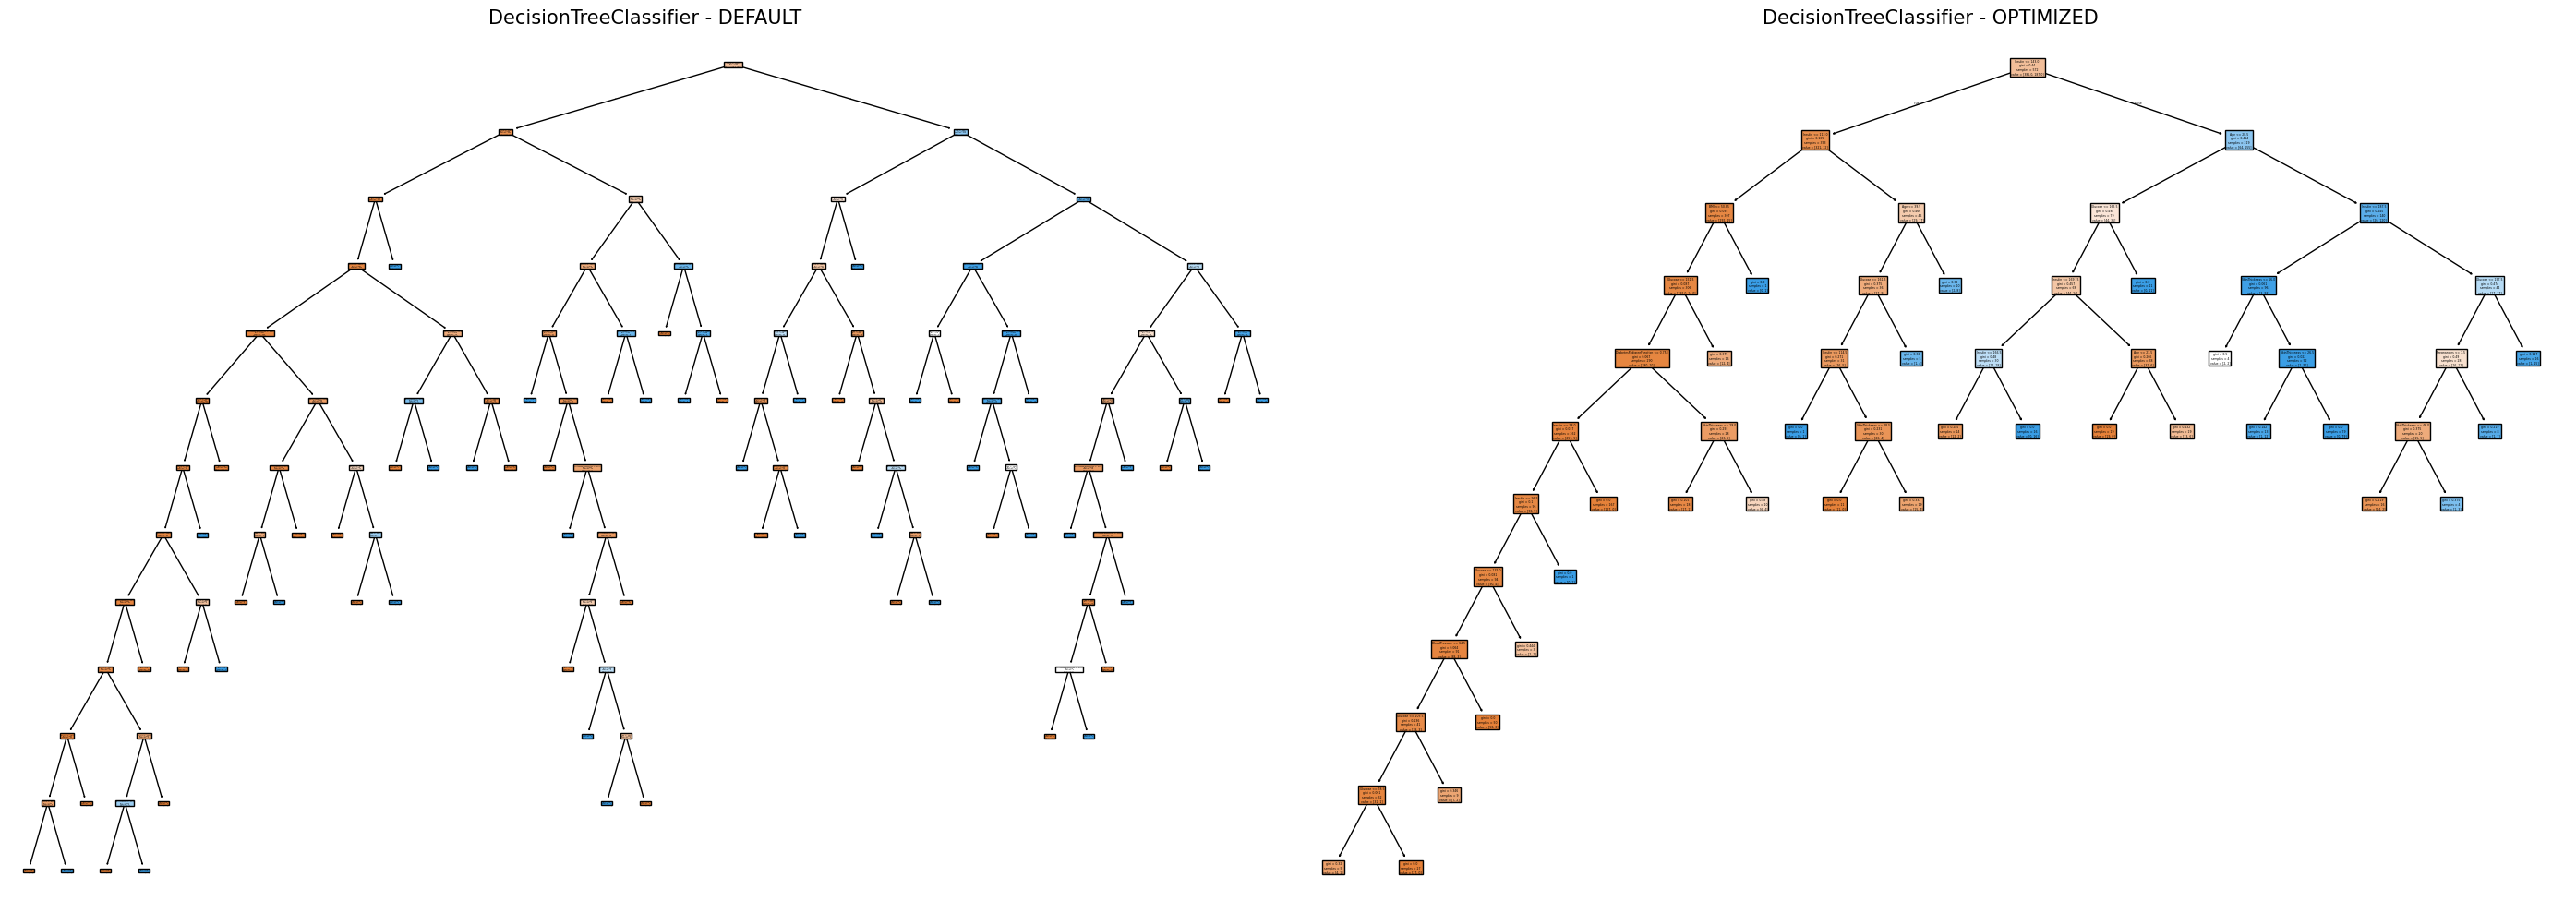


==================== 📊 MODEL PLOT: DecisionTreeRegressor ====================


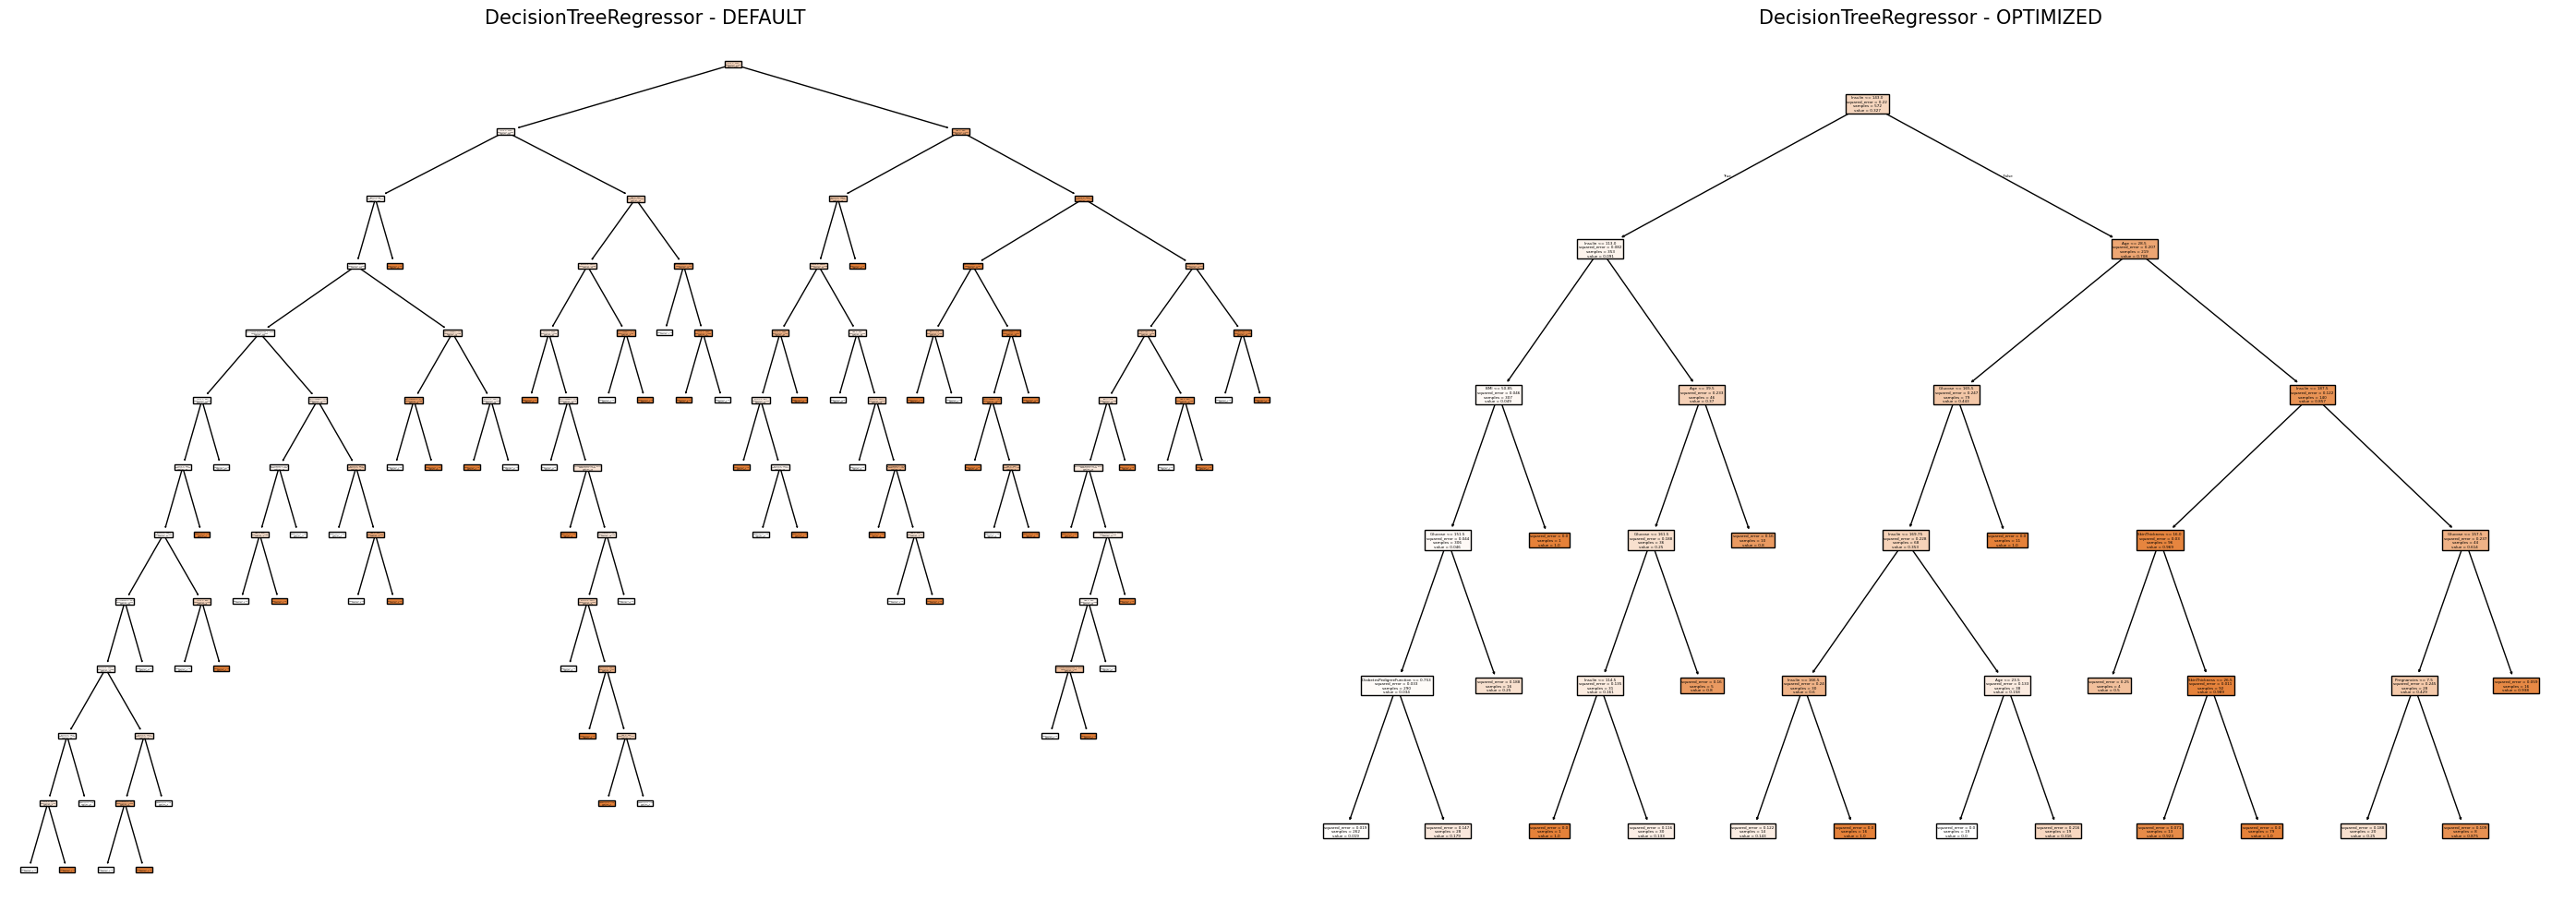

In [ ]:
# -------------------------------
# STEP 16) PREDICTION MODELS
# -------------------------------
print("STEP 16) PREDICTION MODEL")

# |||||||||||||||||| 
# ||||| INPUTS |||||
# ||||||||||||||||||
rev_to_use = 0  # Enter the desired revision number
grid_cross_validation = 10
grid_classification_scoring = "f1" # Choose between: "accuracy", "precision", "recall", "f1"
grid_regression_scoring = "r2" # Choose between: "neg_root_mean_squared_error", "r2"

classification_models_selection = {
    "LogisticRegression": False,
    "RandomForestClassifier": False,
    "DecisionTreeClassifier": True
}

regression_models_selection = {
    "LinearRegression": False,
    "DecisionTreeRegressor": True,
    "RandomForestRegressor": False,
    "Lasso": False,
    "Ridge": False
}

classification_grids = {
    "LogisticRegression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10, 20, 30]
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20]
    }
}

regression_grids = {
    "LinearRegression": {},
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 1, 10],
        "max_iter": [1000, 5000, 10000]
    },
    "Ridge": {
        "alpha": [0.001, 0.01, 0.1, 1, 10],
        "max_iter": [1000, 5000, 10000]
    },
    "DecisionTreeRegressor": {
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10, 20, 30]
    },
    "RandomForestRegressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20]
    }
}

# Load processed data according to selected revision
try:
    X_train_model = pd.read_csv(output_path + "X_train_final_" + str(rev_to_use) + ".csv")
    X_test_model  = pd.read_csv(output_path + "X_test_final_" + str(rev_to_use) + ".csv")
    y_train_model = pd.read_csv(output_path + "y_train_final_" + str(rev_to_use) + ".csv").squeeze()
    y_test_model  = pd.read_csv(output_path + "y_test_final_" + str(rev_to_use) + ".csv").squeeze()

except FileNotFoundError as e:
    raise FileNotFoundError(
        f"❌ The selected revision rev={rev_to_use} does NOT exist.\n"
        f"Missing file: {e.filename}\n"
        f"Please check available revision numbers in '../data/processed/'."
    )
print(f"➡️ Loaded revision {rev_to_use}")

# Available models
classification_available = {
    "LogisticRegression": LogisticRegression(random_state=random_seed),
    "RandomForestClassifier": RandomForestClassifier(random_state=random_seed),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=random_seed)
}

regression_available = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(random_state=random_seed),
    "Ridge": Ridge(random_state=random_seed),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=random_seed),
    "RandomForestRegressor": RandomForestRegressor(random_state=random_seed)
}

#  Auxiliary functions
def compute_classification_metrics(y_true, y_pred, avg, pos_label):
    metrics = {}
    metrics["Accuracy"]  = accuracy_score(y_true, y_pred)
    metrics["Precision"] = precision_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["Recall"]    = recall_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["F1_score"]  = f1_score(y_true, y_pred, average=avg, pos_label=pos_label)
    return metrics

def compute_regression_metrics(y_true, y_pred):
    metrics = {}
    metrics["MAE"]  = mean_absolute_error(y_true, y_pred)
    metrics["MSE"]  = mean_squared_error(y_true, y_pred)
    metrics["RMSE"] = np.sqrt(metrics["MSE"])
    metrics["R2"]   = r2_score(y_true, y_pred)
    return metrics

def set_average_proposal(y):
    unique_count = y.nunique()
    if unique_count == 2:
        freq = y.value_counts()
        pos_label = freq.index[-1]
        return "binary", pos_label, grid_classification_scoring

    freq_norm = y.value_counts(normalize=True)
    imbalance_ratio = freq_norm.max() / freq_norm.min()

    if imbalance_ratio <= 1.2:
        return "micro", None, grid_classification_scoring + "_micro" if grid_classification_scoring != "accuracy" else grid_classification_scoring
    if imbalance_ratio <= 1.5:
        return "macro", None, grid_classification_scoring + "_macro" if grid_classification_scoring != "accuracy" else grid_classification_scoring
    return "weighted", None, grid_classification_scoring + "_weighted" if grid_classification_scoring != "accuracy" else grid_classification_scoring

def left_align(df):
    return df.style.set_table_styles(
        [{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}])

# List with selected models
classification_selected_list = []
regression_selected_list = []
for model_name, active in classification_models_selection.items():
    if active:
        classification_selected_list.append(model_name)
for model_name, active in regression_models_selection.items():
    if active:
        regression_selected_list.append(model_name)

# Auto-add Lasso/Ridge if LinearRegression is selected
if "LinearRegression" in regression_selected_list:
    if "Lasso" not in regression_selected_list:
        regression_selected_list.append("Lasso")
    if "Ridge" not in regression_selected_list:
        regression_selected_list.append("Ridge")

print(f"\n - Classification models selected: {classification_selected_list}")
print(f" - Regression models selected:     {regression_selected_list}")

# Parameters needed for classification metrics
if len(classification_selected_list) > 0:
    proposed_avg, proposed_pos, proposed_score = set_average_proposal(y_train_model)

# ======================================================
#  CLASSIFICATION MODELS
# ======================================================
trained_models = {} 
default_results_class = {}
optimized_results_class = {}
for model_name in classification_selected_list:
    # Instance DEFAULT model
    default_model = classification_available[model_name] 
    # Train DEFAULT model
    default_model.fit(X_train_model, y_train_model)
    # Predict with trained DEFAULT model
    y_pred_train = default_model.predict(X_train_model)
    y_pred_test  = default_model.predict(X_test_model)
    # Calculate metricts for DEFAULT model
    metrics_train = compute_classification_metrics(y_train_model, y_pred_train, proposed_avg, proposed_pos)
    metrics_test  = compute_classification_metrics(y_test_model, y_pred_test, proposed_avg, proposed_pos)
    # Build final table with results for DEFAULT model
    default_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = metrics_train
    default_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = metrics_test
    # Store trained model
    trained_models[model_name] = {"default": default_model, "optimized": None}

    # Set GRID parameters
    grid_params = classification_grids[model_name]
    if len(grid_params) > 0:
        # Instance GRID
        grid = GridSearchCV(
            estimator = classification_available[model_name],
            param_grid = grid_params,
            scoring = proposed_score,
            cv = grid_cross_validation)
        # Train GRID
        grid.fit(X_train_model, y_train_model)
        # Get best estimator configuration (OPTIMIZED model)
        best_model = grid.best_estimator_
        # Predict with trained OPTIMIZED model
        y_train_opt = best_model.predict(X_train_model)
        y_test_opt  = best_model.predict(X_test_model)
        # Calculate metricts for OPTIMIZED model
        metrics_train_opt = compute_classification_metrics(y_train_model, y_train_opt, proposed_avg, proposed_pos)
        metrics_test_opt  = compute_classification_metrics(y_test_model,  y_test_opt,  proposed_avg, proposed_pos)
        # Build final table with results for OPTIMIZED model
        optimized_results_class["OPTIMIZED " + model_name + " - 🏋️ TRAIN"] = {**metrics_train_opt, "Best Parameters": grid.best_params_}
        optimized_results_class["OPTIMIZED " + model_name + " - 🧪 TEST"]  = {**metrics_test_opt,  "Best Parameters": grid.best_params_}
        # Store trained model
        trained_models[model_name]["optimized"] = best_model
    else:
        optimized_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = {**metrics_train, "Best Parameters": "N/A"}
        optimized_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = {**metrics_test,  "Best Parameters": "N/A"}

# ======================================================
#  REGRESSION MODELS
# ======================================================
default_results_reg = {}
optimized_results_reg = {}
for model_name in regression_selected_list:
    # Instance DEFAULT model
    default_model = regression_available[model_name]
    # Train DEFAULT model
    default_model.fit(X_train_model, y_train_model)
    # Predict with trained DEFAULT model
    y_pred_train = default_model.predict(X_train_model)
    y_pred_test  = default_model.predict(X_test_model)
    # Calculate metricts for DEFAULT model
    metrics_train = compute_regression_metrics(y_train_model, y_pred_train)
    metrics_test  = compute_regression_metrics(y_test_model, y_pred_test)
    # Build final table with results for DEFAULT model
    default_results_reg["DEFAULT " + model_name + " - 🏋️ TRAIN"] = metrics_train
    default_results_reg["DEFAULT " + model_name + " - 🧪 TEST"]  = metrics_test
    # Store trained model
    trained_models[model_name] = {"default": default_model, "optimized": None}

    # Set GRID parameters
    grid_params = regression_grids[model_name]
    if len(grid_params) > 0:
        # Instance GRID
        grid = GridSearchCV(
            estimator = regression_available[model_name],
            param_grid = grid_params,
            scoring = grid_regression_scoring,
            cv = grid_cross_validation)
        # Train GRID
        grid.fit(X_train_model, y_train_model)
        # Get best estimator configuration (OPTIMIZED model)
        best_model = grid.best_estimator_
        # Predict with trained OPTIMIZED model
        y_train_opt = best_model.predict(X_train_model)
        y_test_opt  = best_model.predict(X_test_model)
        # Calculate metricts for OPTIMIZED model
        metrics_train_opt = compute_regression_metrics(y_train_model, y_train_opt)
        metrics_test_opt  = compute_regression_metrics(y_test_model,  y_test_opt)
        # Build final table with results for OPTIMIZED model
        optimized_results_reg["OPTIMIZED " + model_name + " - 🏋️ TRAIN"] = {**metrics_train_opt, "Best Parameters": grid.best_params_}
        optimized_results_reg["OPTIMIZED " + model_name + " - 🧪 TEST"]  = {**metrics_test_opt,  "Best Parameters": grid.best_params_}
        # Store trained model
        trained_models[model_name]["optimized"] = best_model
    else:
        optimized_results_reg["DEFAULT " + model_name + " - 🏋️ TRAIN"] = {**metrics_train, "Best Parameters": "N/A"}
        optimized_results_reg["DEFAULT " + model_name + " - 🧪 TEST"]  = {**metrics_test,  "Best Parameters": "N/A"}

# ======================================================
#  FINAL TABLES
# ======================================================
print("\n==================== ⚖️ FINAL CLASSIFICATION TABLES ====================")
display(left_align(pd.DataFrame(default_results_class).T))
display(left_align(pd.DataFrame(optimized_results_class).T))

print("\n==================== 📈 FINAL REGRESSION TABLES ========================")
display(left_align(pd.DataFrame(default_results_reg).T))
display(left_align(pd.DataFrame(optimized_results_reg).T))

# ======================================================
# PLOTTING (DEFAULT vs OPTIMIZED)
# ======================================================

# registry of plotters
model_plotters = {}

# --- Register Decision Tree plotter ---
def plot_tree_model(model, X, ax):
    plot_tree(model, feature_names=X.columns, filled=True, ax=ax)

model_plotters["DecisionTreeClassifier"] = plot_tree_model
model_plotters["DecisionTreeRegressor"]  = plot_tree_model

# ======================================================
# EXECUTE PLOTS FOR MODELS THAT SUPPORT IT
# ======================================================

for model_name, model_dict in trained_models.items():
    # Only plot models that have a registered plotter
    if model_name not in model_plotters:
        continue

    print(f"\n==================== 📊 MODEL PLOT: {model_name} ====================")

    # Retrieve the specific plotter for this model type
    plotter = model_plotters[model_name]

    # Create figure with 2 subplots (default vs optimized)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 10))

    # DEFAULT
    plotter(model_dict["default"], X_train_model, axes[0])
    axes[0].set_title(f"{model_name} - DEFAULT", fontsize=my_font_size)

    # OPTIMIZED
    plotter(model_dict["optimized"], X_train_model, axes[1])
    axes[1].set_title(f"{model_name} - OPTIMIZED", fontsize=my_font_size)

    plt.tight_layout()
    plt.show()

In [45]:
# -------------------------------
# STEP 17) SAVE MODELS
# -------------------------------
print("STEP 17) SAVE MODELS")

# |||||||||||||||||| 
# ||||| INPUTS |||||
# ||||||||||||||||||
models_output_path = "../models/"   # Folder where models will be saved

# Iterate over all trained models (default + optimized)
for model_name, model_dict in trained_models.items():
    # DEFAULT
    if model_dict["default"] is not None:
        filename_default = models_output_path + f"{model_name}_DEFAULT_{rev_to_use}.sav"
        dump(model_dict["default"], open(filename_default, "wb"))

    # OPTIMIZED
    if model_dict["optimized"] is not None:
        filename_optimized = models_output_path + f"{model_name}_OPTIMIZED_{rev_to_use}.sav"
        dump(model_dict["optimized"], open(filename_optimized, "wb"))

print("\n✅ All models saved successfully.")

STEP 17) SAVE MODELS

✅ All models saved successfully.
